In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
import re
from time import time
from func import *
from sklearn.decomposition import PCA
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, MiniBatchKMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.cluster import adjusted_rand_score
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import KeyedVectors
import gensim.downloader as gensim_api
import gensim
import json
import cv2
import plotly.graph_objs as go
import plotly.express as px
import glob
import tensorflow as tf
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image_dataset_from_directory
%matplotlib inline

In [2]:
print("Python", sys.version_info.major, ".", sys.version_info.minor)
print("Matplotlib", mpl.__version__)
print("Pandas", pd.__version__)
print("Nympy", np.__version__)
print("Seaborn", sns.__version__)
print("Gensim", gensim.__version__)
print("Tensorflow", tf.__version__)

Python 3 . 8
Matplotlib 3.3.1
Pandas 1.3.4
Nympy 1.22.0
Seaborn 0.11.0
Gensim 3.8.3
Tensorflow 2.4.0


In [3]:
text_path = ""
image_path = "Images/"

In [4]:
path_text_df = os.path.join(text_path, "flipkart_com-ecommerce_sample_1050.csv")

In [11]:
df = pd.read_csv(path_text_df,
                 sep=',', 
                 index_col = 'uniq_id',
                 encoding ='utf-8', parse_dates=[1]
                    )
df.reset_index(inplace=True)

EDA and basic info on the data

In [12]:
df.head()

uniq_id           crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1  7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2  64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3  d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4  6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [17]:
def get_url(df):
    url = df.loc[:2, 'product_url']
    return url
# use the function to get the url of the products in the dataframe
get_url(df)

0    http://www.flipkart.com/elegance-polyester-mul...
1    http://www.flipkart.com/sathiyas-cotton-bath-t...
2    http://www.flipkart.com/eurospa-cotton-terry-f...
Name: product_url, dtype: object

In [22]:
#function to print the number of rows and columns in the dataframe without showing the head and tail of the dataframe
def print_shape(df):
    print(f'Df has {df.shape[0]} rows')
    print(f'Df has {df.shape[1]} columns')
    return df
    # use the function to print the number of rows and columns in the dataframe
print_shape(df)

Df has 1050 rows
Df has 15 columns


uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [24]:
#function to print the unique brands in the dataframe
def print_unique_brands(df):
    print(f'Unique brands are {df.brand.unique().shape[0]}')
    return df
    # use the function to print the unique brands in the dataframe
print_unique_brands(df)

Unique brands are 491


uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [27]:
# function to reveal sample of textual data in the dataframe using product_name
def print_sample_text(df):
    print(f'Sample of product_name is {df.loc[:5, "product_name"]}')
    return df
    # use the function to reveal sample of textual data in the dataframe using product_name
print_sample_text(df)


Sample of product_name is 0    Elegance Polyester Multicolor Abstract Eyelet ...
1                           Sathiyas Cotton Bath Towel
2                  Eurospa Cotton Terry Face Towel Set
3    SANTOSH ROYAL FASHION Cotton Printed King size...
4    Jaipur Print Cotton Floral King sized Double B...
5    Maserati Time R8851116001 Analog Watch  - For ...
Name: product_name, dtype: object


uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [28]:
# function to reveal sample of textual categories trees in the dataframe
def print_sample_text(df):
    print(f'Sample of product_name is {df.loc[:5, "product_category_tree"]}')
    return df
    # use the function to reveal sample of textual data in the dataframe using product_name
print_sample_text(df)

Sample of product_name is 0    ["Home Furnishing >> Curtains & Accessories >>...
1    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
5    ["Watches >> Wrist Watches >> Maserati Time Wr...
Name: product_category_tree, dtype: object


uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [32]:
# function to reveal sample of textual description in the dataframe
def print_sample_text(df):
    print(f'Sample of product_name is: {df.loc[3, "description"]}')
    return df
    # use the function to reveal sample of textual data in the dataframe using product_name
print_sample_text(df)

Sample of product_name is: Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washable Yes Type Flat Material Cotton Model Name Gold Design Royal Cotton Printed Wedding & Gifted Double Bedsheet With 2 Pillow cover Model ID goldbedi-38 Color Multicolor Size King Fabric Care Machine Wash, Do Not Bleach Dimensions Flat Sheet Width 90 inch / 230 cm Fitted Sheet Width 228 cm Pillow Cover Width 16 inch / 43 cm Pillow Cover Length 28 inch / 72 cm Fitted Sheet Depth 280 cm Fitted Sheet Length 278 cm Flat Sheet Depth 282 cm Flat Sheet Length 110 inch / 280 cm In the Box Number of Contents in Sales Package 1 Sales Package 1 Bedsheet,2 Pillow Cover


uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [37]:
def print_sample_text(df):
    print(f'Sample of product_specification is: {df.loc[3, "product_specifications"]}')
    return df
    # use the function to reveal sample of textual data in the dataframe using product_name
print_sample_text(df)

Sample of product_specification is: {"product_specification"=>[{"key"=>"Brand", "value"=>"SANTOSH ROYAL FASHION"}, {"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Type", "value"=>"Flat"}, {"key"=>"Material", "value"=>"Cotton"}, {"key"=>"Model Name", "value"=>"Gold Design Royal Cotton Printed Wedding and Gifted Double Bedsheet With 2 Pillow cover"}, {"key"=>"Model ID", "value"=>"goldbedi-38"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Size", "value"=>"King"}, {"key"=>"Fabric Care", "value"=>"Machine Wash, Do Not Bleach"}, {"key"=>"Flat Sheet Width", "value"=>"90 inch / 230 cm"}, {"key"=>"Fitted Sheet Width", "value"=>"228 cm"}, {"key"=>"Pillow Cover Width", "value"=>"16 inch / 43 cm"}, {"key"=>"Pillow Cover Length", "value"=>"28 inch / 72 cm"}, {"key"=>"Fitted Sheet Depth", "value"=>"280 cm"}, {"key"=>"Fitted Sheet Length", "value"=>"278 cm"}, {"key"=>"Flat Sheet Depth", "value"=>"282 cm"}, {"key"=>"Flat Sheet Length", "value"=>"110 inch / 280 cm"}, {"key"=>"Number of Cont

uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [39]:
# funvtion to view nan values in percentage in the dataframe
def view_nan_values(df):
    na = df.isnull().sum()/df.shape[0]
    nt_na = 100 - na
    df = pd.DataFrame({'NaN(in %)': na, 'Not NaN(in %)': nt_na})
    return df
# use the function to view nan values in percentage in the dataframe
view_nan_values(df)
#Most fields have full info, only one row(brand) has missing info

NaN(in %)  Not NaN(in %)
uniq_id                   0.000000     100.000000
crawl_timestamp           0.000000     100.000000
product_url               0.000000     100.000000
product_name              0.000000     100.000000
product_category_tree     0.000000     100.000000
pid                       0.000000     100.000000
retail_price              0.000952      99.999048
discounted_price          0.000952      99.999048
image                     0.000000     100.000000
is_FK_Advantage_product   0.000000     100.000000
description               0.000000     100.000000
product_rating            0.000000     100.000000
overall_rating            0.000000     100.000000
brand                     0.321905      99.678095
product_specifications    0.000952      99.999048

In [40]:
# function to describe the numerical data in the dataframe
def describe_numerical_data(df):
    print(f'Numerical data description: {df.describe()}')
    return df
    # use the function to describe the numerical data in the dataframe
describe_numerical_data(df)

Numerical data description:         retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000


uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [43]:
# function TO CREATE A DATAFRAME pd.DataFrame for the numerical data in the dataframe
def create_numerical_data_df(df):
    numerical_data_df = df.select_dtypes(include=['int64', 'float64'])
    # normalize the numerical data in the dataframe using np.log1p and np.log with a column name for each
    numerical_data_df = numerical_data_df.apply(np.log)
    numerical_data_df.columns = [f'log_{col}' for col in numerical_data_df.columns]
    #include the original numerical data in the dataframe
    numerical_data_df = pd.concat([numerical_data_df, df.select_dtypes(include=['int64', 'float64'])], axis=1)
    return numerical_data_df
    # use the function to create a dataframe pd.DataFrame for the numerical data in the dataframe
create_numerical_data_df(df)



log_retail_price  log_discounted_price  retail_price  discounted_price
0             7.549083              6.801283        1899.0             899.0
1             6.396930              6.107023         600.0             449.0
2                  NaN                   NaN           NaN               NaN
3             7.900637              7.169350        2699.0            1299.0
4             7.862882              6.548219        2599.0             698.0
...                ...                   ...           ...               ...
1045          7.243513              6.906755        1399.0             999.0
1046          8.503094              7.547502        4930.0            1896.0
1047          8.411833              7.278629        4500.0            1449.0
1048          8.150468              7.195187        3465.0            1333.0
1049          7.081709              6.388561        1190.0             595.0

[1050 rows x 4 columns]

In [46]:
# function to define x_values as the numerical data and the log form of the numerical data in the dataframe
x_val = create_numerical_data_df(df)
x_val.head()

log_retail_price  log_discounted_price  retail_price  discounted_price
0          7.549083              6.801283        1899.0             899.0
1          6.396930              6.107023         600.0             449.0
2               NaN                   NaN           NaN               NaN
3          7.900637              7.169350        2699.0            1299.0
4          7.862882              6.548219        2599.0             698.0

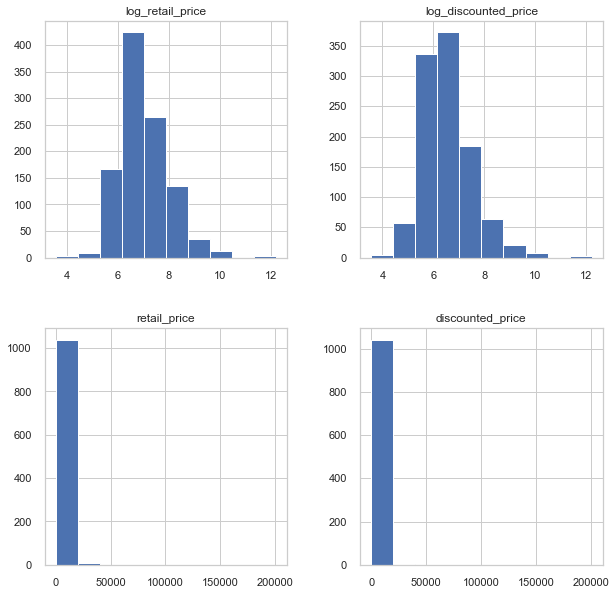

log_retail_price  log_discounted_price  retail_price  discounted_price
0             7.549083              6.801283        1899.0             899.0
1             6.396930              6.107023         600.0             449.0
2                  NaN                   NaN           NaN               NaN
3             7.900637              7.169350        2699.0            1299.0
4             7.862882              6.548219        2599.0             698.0
...                ...                   ...           ...               ...
1045          7.243513              6.906755        1399.0             999.0
1046          8.503094              7.547502        4930.0            1896.0
1047          8.411833              7.278629        4500.0            1449.0
1048          8.150468              7.195187        3465.0            1333.0
1049          7.081709              6.388561        1190.0             595.0

[1050 rows x 4 columns]

In [51]:
# function to plot the distribution x_val
def plot_distribution(x_val):
    # plot the distribution of the numerical data in the dataframe
    x_val.hist(figsize=(10,10))
    plt.show()
    return x_val
    # use the function to plot the distribution of the numerical data in the dataframe
plot_distribution(x_val)



In [53]:
regexp_cat = '\[\"(?P<cat_1>[\w\s&,\']+)>>(?P<cat_2>[\w\s&,\']+)>*(?P<cat_3>[\w\s&,\']*).*'
def get_cat(df, regexp, name):

    """ Test a regexp on a text, if there is a match, return the group named 'name' """
    match = re.search(regexp, df)
    if match == None:
        pass 
    else:
        return match.group(name).strip()


In [54]:
# fucntion to get the category tree from the dataframe
def get_category_tree(df):
    df['category_tree1'] = df['product_category_tree'].apply(lambda x: get_cat(x, regexp_cat, 'cat_1'))
    df['category_tree2'] = df['product_category_tree'].apply(lambda x: get_cat(x, regexp_cat, 'cat_2'))
    df['category_tree3'] = df['product_category_tree'].apply(lambda x: get_cat(x, regexp_cat, 'cat_3'))
    return df
    # use the function to get the category tree from the dataframe
get_category_tree(df)

uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [55]:
#function to get the uniuqe categories in each category tree in the dataframe
def get_unique_categories(df):
    print(f'Unique categories in category_tree1 are {df.category_tree1.unique().shape[0]}')
    print(f'Unique categories in category_tree2 are {df.category_tree2.unique().shape[0]}')
    print(f'Unique categories in category_tree3 are {df.category_tree3.unique().shape[0]}')
    return df
    # use the function to get the uniuqe categories in each category tree in the dataframe
get_unique_categories(df)

Unique categories in category_tree1 are 7
Unique categories in category_tree2 are 62
Unique categories in category_tree3 are 242


uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [56]:
# function to get the unique values in each category tree in the dataframe
def get_unique_values(df):
    print(f'Unique values in category_tree1 are {df.category_tree1.unique()}')
    print(f'Unique values in category_tree2 are {df.category_tree2.unique()}')
    print(f'Unique values in category_tree3 are {df.category_tree3.unique()}')
    return df
    # use the function to get the unique values in each category tree in the dataframe
get_unique_values(df)

Unique values in category_tree1 are ['Home Furnishing' 'Baby Care' 'Watches' 'Home Decor & Festive Needs'
 'Kitchen & Dining' 'Beauty and Personal Care' 'Computers']
Unique values in category_tree2 are ['Curtains & Accessories' 'Baby Bath & Skin' 'Bed Linen' 'Wrist Watches'
 'Living Room Furnishing' 'Bath Linen' 'Candles & Fragrances'
 'Tableware & Cutlery' 'Lighting' 'JMD Home Furnishing' 'Infant Wear'
 "Kripa's Home Furnishing" 'Hair Care' 'Coffee Mugs' 'Network Components'
 'Tablet Accessories' 'Cookware' 'Laptop Accessories' 'Makeup'
 'Combos and Kits' 'Feeding & Nursing' 'Baby Bedding'
 'Kitchen & Dining Linen' 'Containers & Bottles'
 'Consumables & Disposables' 'Wall Decor & Clocks'
 'Table Decor & Handicrafts' 'Flowers, Plants & Vases' 'Software'
 'Showpieces' 'Furniture & Furnishings' 'Decorative Lighting & Lamps'
 'Baby Grooming' 'Computer Peripherals' 'Cushions, Pillows & Covers'
 'Storage' 'Health Care' 'Body and Skin Care' 'Kitchen Tools'
 'TRUE Home Decor & Festive Needs' 

uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [57]:
# function to Remplace empty strings by "Unknown" for each category tree in the dataframe
def replace_empty_strings(df):
    df.category_tree1 = df.category_tree1.replace('', 'Unknown')
    df.category_tree2 = df.category_tree2.replace('', 'Unknown')
    df.category_tree3 = df.category_tree3.replace('', 'Unknown')
    return df
    # use the function to Remplace empty strings by "Unknown" for each category tree in the dataframe
replace_empty_strings(df)

uniq_id           crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7 2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590 2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74 2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8 2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7 2016-06-20 08:49:52+00:00   
...                                ...                       ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc 2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c 2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009 2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6 2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44 2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049        1

In [64]:
df.groupby('category_tree1').count()["uniq_id"]
# for each product in category_tree1, there are 150 products each in the dataframe

category_tree1
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: uniq_id, dtype: int64

### NLP commence

In [66]:
# function to aggregate the text contained in the dataframe and corresponding to a specific category:

stopwords = nltk.corpus.stopwords.words('english') + ['thus', 'cm', 'com', 'inch', 'com']

# add some non_informative words to the stopwords
non_informativewords = ["price", "cash", "delivery", "pack", "flipkart", "buy", "sale", "product", "feature",
    "print", "online", "free", "shipping", "ship"]
stopwords += non_informativewords

#define stemmer
stemmer = nltk.stem.SnowballStemmer('english')

#define lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [67]:
def agg_pd_txt(df, col_cond, value, col_toagg):
    result = df[df[col_cond]==value][col_toagg]
    result = result.agg("sum").lower()
    return result

In [68]:
def clean_non_words(text, lower=True):
    """Remove all non-alphabetical characters and 1-2 letters words, pass text to lower case if lower is set to True."""
    if lower:
        text = text.lower()
    else: pass
    # Select only words:
    text = re.sub("[^a-z]+", " ", text)
    # Only words of 3 characters or more:
    text = re.sub(r"\b\w{1}\b", "", text)
    text = re.sub(r"\b\w{2}\b", "", text)
    # Clean multiple whitespaces:
    text = re.sub("\s+", " ", text) 
    text = text.strip()
    return text

In [69]:
def tokenize_clean_sw_stem(text, stopwords, stemmer):
    """Tokenize with simple split, remove stopwords, stem."""
    # Tokenize
    text = text.split()
    # Stemming
    text = [stemmer.stem(w) for w in text]
    # Remove stopwords
    text = [w for w in text if w not in stopwords]
    return text

In [71]:
def tokenize_clean_sw_lemmatize(text, stopwords, lemmatizer):
    """Tokenize with simple split, remove stopwords, lemmatize with tags."""
    # Tokenize
    text = text.split()

    # Tag text and lemmatize accordingly
    tagged_text = nltk.pos_tag(text)
    lemmatized_text=[]
    for word, tag in tagged_text:
        if tag.startswith('J'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'a'))
        elif tag.startswith('V'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'v'))
        elif tag.startswith('N'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'n'))
        elif tag.startswith('R'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'r'))
        else:
            lemmatized_text.append(lemmatizer.lemmatize(word))

    # Remove stopwords
    lemmatized_text = [w for w in lemmatized_text if w not in stopwords]

    return lemmatized_text

In [72]:
# Create dictionnaries that will contain corpus:
products_names = {"furnishing":"", "baby":"", "watches":"", "decor":"", 
    "kitchen":"", "beauty":"", "computers":""}

descriptions = {"furnishing":"", "baby":"", "watches":"", "decor":"", 
    "kitchen":"", "beauty":"", "computers":""}

# List categories:
categories = ["Home Furnishing", "Baby Care", "Watches", "Home Decor & Festive Needs", 
    "Kitchen & Dining", "Beauty and Personal Care", "Computers"]

In [73]:
# Clean dictionnaries
products_names = {"furnishing":"", "baby":"", "watches":"", "decor":"", 
    "kitchen":"", "beauty":"", "computers":""}

descriptions = {"furnishing":"", "baby":"", "watches":"", "decor":"", 
    "kitchen":"", "beauty":"", "computers":""}

In [78]:
# Same steps but with lemmatizer:

for key, cat in zip(products_names.keys(), categories):
    products_names[key] = agg_pd_txt(df,"category_tree1", cat, "product_name")
    products_names[key] = clean_non_words(products_names[key])
    products_names[key] = tokenize_clean_sw_lemmatize(products_names[key], stopwords, lemmatizer)

for key, cat in zip(descriptions.keys(), categories):
    descriptions[key] = agg_pd_txt(df,"category_tree1", cat, "description")
    descriptions[key] = clean_non_words(descriptions[key])
    descriptions[key] = tokenize_clean_sw_lemmatize(descriptions[key], stopwords, lemmatizer)

In [79]:
descriptions_freq = dict()
total, unique = [], []

for k, v in zip(descriptions.keys(), descriptions.values()):
    descriptions_freq[k] = fq =  nltk.FreqDist(v)
    total.append(len(v))
    unique.append(len(fq.keys()))

descriptions_n_words = pd.DataFrame({"total":total, "unique":unique}, index=descriptions.keys())
descriptions_n_words.sort_values(by="total", ascending=False, inplace=True)

In [80]:
products_names_freq = dict()
total, unique = [], []

for k, v in zip(products_names.keys(), products_names.values()):
    products_names_freq[k] = fq =  nltk.FreqDist(v)
    total.append(len(v))
    unique.append(len(fq.keys()))

products_names_n_words = pd.DataFrame({"total":total, "unique":unique}, index=descriptions.keys())
products_names_n_words.sort_values(by="total", ascending=False, inplace=True)

In [81]:
descriptions_n_words

total  unique
kitchen      8835    1143
baby         7759    1208
decor        7629    1447
computers    7625    1017
furnishing   5191     816
beauty       4966    1165
watches      4040     475

In [82]:
products_names_n_words

total  unique
beauty        878     446
decor         814     413
computers     783     321
baby          741     352
furnishing    718     247
watches       683     221
kitchen       645     329

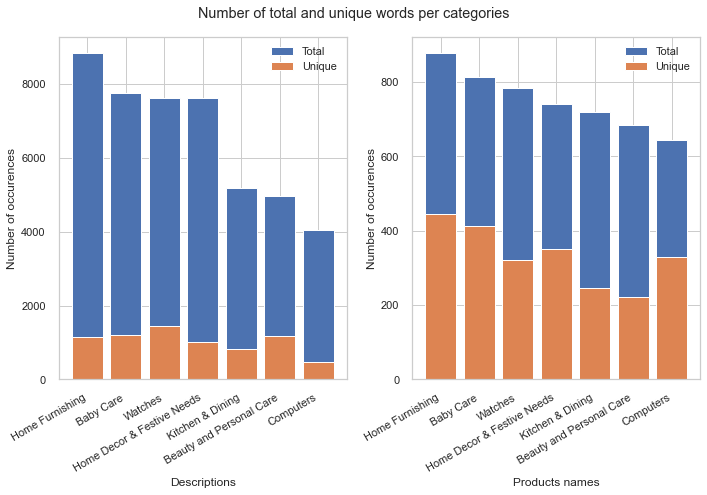

In [83]:
fig, ax = plt.subplots (1, 2, figsize=(10, 7), tight_layout=True)
fig.suptitle("Number of total and unique words per categories")

datas = [descriptions_n_words, products_names_n_words]
xlabels = ["Descriptions", "Products names"]

for axe, data, xlab in zip([0, 1], datas, xlabels):
    ax[axe].bar(height=data["total"], x=categories, label="Total")
    ax[axe].bar(height=data["unique"], x=categories, label="Unique")
    ax[axe].set_ylabel("Number of occurences")
    ax[axe].set_xlabel(xlab)
    ax[axe].set_xticks(categories)
    ax[axe].set_xticklabels(categories, rotation=30, ha="right")
    ax[axe].legend()

In [84]:
furnishing_desc_freq = pd.Series(descriptions_freq["furnishing"])
furnishing_desc_freq.sort_values(ascending=False, inplace=True)

furnishing_names_freq = pd.Series(products_names_freq["furnishing"])
furnishing_names_freq.sort_values(ascending=False, inplace=True)

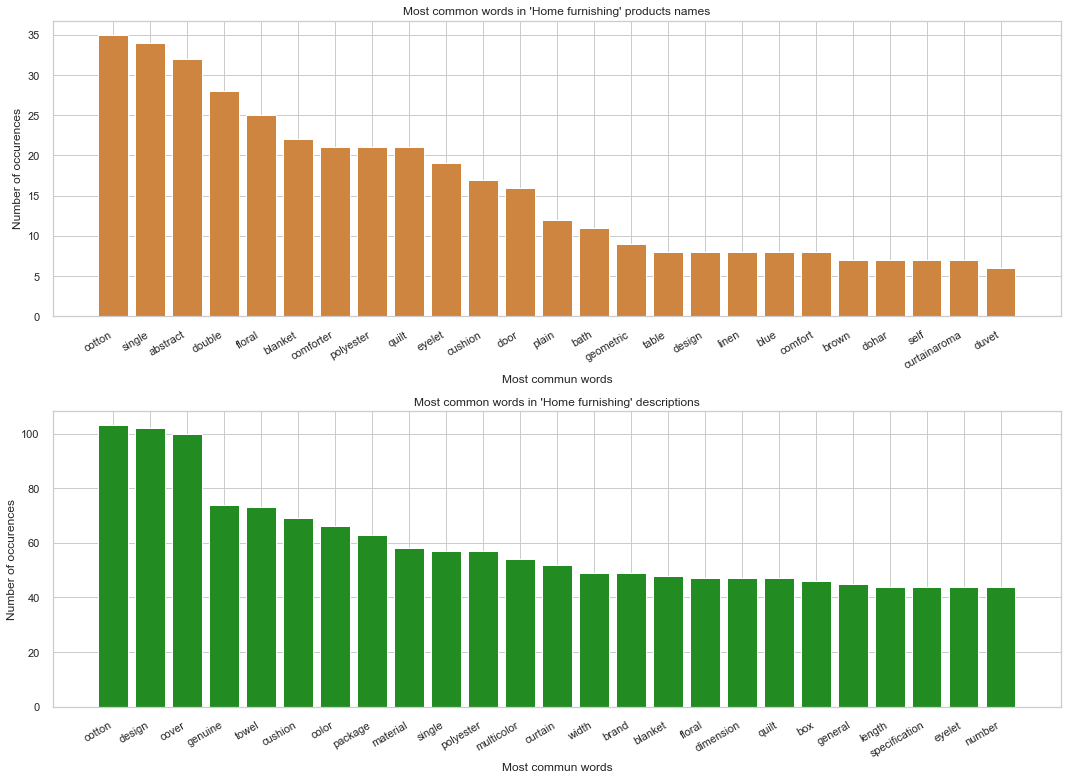

In [85]:
fig, ax = plt.subplots(2, 1, figsize=(15, 11), tight_layout=True)
datas = [furnishing_names_freq, furnishing_desc_freq]
titles = ["Most common words in 'Home furnishing' products names", "Most common words in 'Home furnishing' descriptions"]
xlabels = ["Products names", "Descriptions"]
colors = ["peru", "forestgreen"]

for axe, data, title, xlab, color in zip([0, 1], datas, titles, xlabels, colors):
    ax[axe].bar(height=data[:25], x=data[:25].index, color=color)
    ax[axe].set_title(title)
    ax[axe].set_ylabel("Number of occurences")
    ax[axe].set_xlabel("Most commun words")
    ax[axe].set_xticks(data[:25].index)
    ax[axe].set_xticklabels(data[:25].index, rotation=30, ha="right")

In [86]:
# Aggregate product names and descriptions in a new column:
df["name_description"] = df["product_name"] + df["description"]

In [88]:
# Keep only relevant columns for text analysis:
txt_clean = df[["image", "product_name", "description", 'category_tree1', 'category_tree2', 'category_tree3', "name_description"]].copy()
txt_clean.head()

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description   category_tree1  \
0  Key Features of Elegance Polyester Multicolor ...  Home Furnishing   
1  Specifications of Sathiyas Cotton Bath Towel (...        Baby Care   
2  Key Features of Eurospa Cotton Terry Face Towe...        Baby Care   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  Home Furnishing   
4  Key Features of Jaipur Print Cotton Floral Kin...  Home Furnishing   

           category_tree2    category_tree3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                    name_description  
0  Elegance Polyester Multicolor Abstract Eyelet ...  
1  Sathiyas Cotton Bath TowelSpecifications of Sa...  
2  Eurospa Cotton Terry Face Towel SetKey Feature...  
3  SANTOSH ROYAL FASHION Cotton Printed King size...  
4  Jaipur Print Cotton Floral King sized Double B...

In [89]:
#Example on a few sentences on the first document of text preprocessing:
# Raw text
txt_example = df.loc[0, "name_description"]
txt_example

'Elegance Polyester Multicolor Abstract Eyelet Door CurtainKey Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant 

In [90]:
# Pass to lower case, remove numbers and less than 3 letters words
txt_example = clean_non_words(txt_example)
txt_example

'elegance polyester multicolor abstract eyelet door curtainkey features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price this curtain enhances the look the interiors this curtain made from high quality polyester fabric features eyelet style stitch with metal ring makes the room environment romantic and loving this curtain ant wrinkle and anti shrinkage and have elegant apparance give your home bright and modernistic appeal with these designs the surreal attention sure steal hearts these contemporary eyelet and valance curtains slide smoothly when you draw them apart first thing the morning welcome the bright sun rays you want wish good morning the whole world and when you draw them close the evening you create the most special moments joyous beauty given the soothing prints bring home the elegant curtain that softly filters light your room that you get the right amount sunlight specifi

In [91]:
# After removing stopwords, stemming and tokenizing:
txt_example_stem = tokenize_clean_sw_stem(txt_example, stopwords, stemmer)
txt_example_stem

['eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtainkey',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'romant',
 'love',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'appar',
 'give',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'smooth',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyous',
 'beauti',
 

In [92]:
# After removing stopwords, lemmatizing and tokenizing:
txt_example_lem = tokenize_clean_sw_lemmatize(txt_example, stopwords, lemmatizer)
txt_example_lem

['elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtainkey',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'curtain',
 'enhance',
 'look',
 'interior',
 'curtain',
 'make',
 'high',
 'quality',
 'polyester',
 'fabric',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'romantic',
 'love',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create',
 'special',
 

In [93]:
# Make a vocabulary set on the whole corpus using our cleaning/tokenizing/lemmatizing functions:
vocabulary = df["name_description"].agg("sum").lower()
vocabulary = clean_non_words(vocabulary)
vocabulary = tokenize_clean_sw_lemmatize(vocabulary, stopwords, lemmatizer)
#vocabulary = set(vocabulary)

In [94]:
whole_corpus_fq = nltk.FreqDist(vocabulary)
whole_corpus_fq = pd.Series(whole_corpus_fq)
whole_corpus_fq.sort_values(ascending=False, inplace=True)

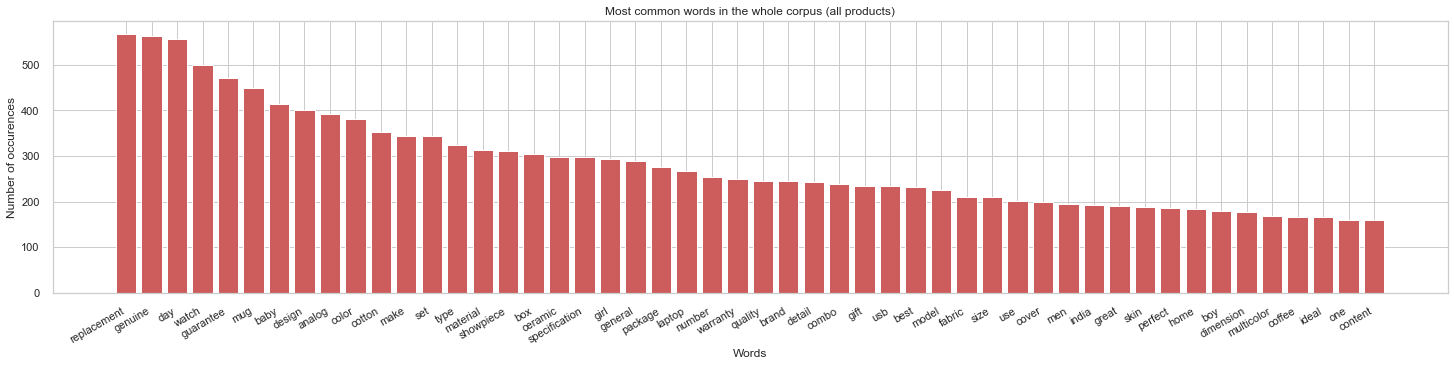

In [95]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.bar(height=whole_corpus_fq[:50], x=whole_corpus_fq[:50].index, color="indianred")
ax.set_title("Most common words in the whole corpus (all products)")
ax.set_xlabel("Words")
ax.set_ylabel("Number of occurences")
ax.set_xticks(whole_corpus_fq[:50].index)
ax.set_xticklabels(whole_corpus_fq[:50].index, rotation=30, ha="right");

In [96]:
# Make copies of our corpus
corpus = df["name_description"].to_numpy().copy()
corpus_series = df["name_description"].copy()

In [97]:
clean_corpus = []
for document in corpus:
    document = clean_non_words(document)
    document = tokenize_clean_sw_lemmatize(document, stopwords, lemmatizer)
    clean_corpus.append(document)

In [51]:
### Bag of words
#Our first approach is to use a bag of words for each document (product name + description) of the corpus.

#We will use our own preprocessing from the functions defined below. We will limitate our BoW to 2500 words (`max_features`).

In [98]:
# Define our preprocessing function:
def txt_preprocessing(df):
    """
    Clean non-words (that include numbers or punctuation and are less than 3 letters).
    Pass text to lower case, tokenize, remove stopwords, lemmatize with tagging.
    """
    df = clean_non_words(df)
    df = tokenize_clean_sw_lemmatize(df, stopwords, lemmatizer)
    return df

In [99]:
# Define count vectorizer to create sparse matrix and fit it:
cv = CountVectorizer(analyzer=txt_preprocessing, max_features=2500)
bow_matrix = cv.fit_transform(corpus).toarray()
# Check shape
bow_matrix.shape

(1050, 2500)

In [100]:
# Get words and make a dataframe for readability:
bow_df = pd.DataFrame(bow_matrix, columns=cv.get_feature_names())
bow_df.head()

aapno  aari  ability  abkl  able  abode  absorb  absorbency  absorbent  \
0      0     0        0     0     0      0       0           0          0   
1      0     0        0     0     0      0       0           0          0   
2      0     0        0     0     0      0       0           1          0   
3      0     0        0     0     0      0       0           0          0   
4      0     0        0     0     0      0       0           0          0   

   abstract  ...  young  youth  youthful  yuva  zero  zingalalaa  zipper  \
0         5  ...      0      0         0     0     0           0       0   
1         0  ...      0      0         0     0     0           0       0   
2         0  ...      0      0         0     0     0           0       0   
3         0  ...      0      0         0     0     0           0       0   
4         0  ...      0      0         0     0     0           0       0   

   zone  zora  zyxel  
0     0     0      0  
1     0     0      0  
2     0     0      0  
3     0     0      0  
4     0     0      0  

[5 rows x 2500 columns]

As expected, we get a very sparse matrix of 1050 lines (products) x 2500 columns (words).
### Tf-idf
#### Tf-idf with min_df parameter set


We will use tf-idf method to extract features from our texts and get a matrix that we will use in a t-SNE visualization (therefore with dimensions reduction).

In [101]:
# Define our tf-idf vectorizer
vectoriser = TfidfVectorizer(analyzer=txt_preprocessing, min_df=0.0015)

In [102]:
# Fit-transform and get our tf_idf matrix
tf_idf_result = vectoriser.fit_transform(corpus)
tf_idf_df=pd.DataFrame(tf_idf_result.toarray(),columns=vectoriser.get_feature_names())
tf_idf_df

aapno  ability  abkl  able  abode  absorb  absorbency  absorbent  \
0       0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1       0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
2       0.0      0.0   0.0   0.0    0.0     0.0    0.070148        0.0   
3       0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
4       0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
...     ...      ...   ...   ...    ...     ...         ...        ...   
1045    0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1046    0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1047    0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1048    0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1049    0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   

      abstract  abuy  ...  yet  york  young  youth  youthful  yuva  zero  \
0      0.20575   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   
1      0.00000   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   
2      0.00000   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   
3      0.00000   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   
4      0.00000   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   
...        ...   ...  ...  ...   ...    ...    ...       ...   ...   ...   
1045   0.00000   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   
1046   0.00000   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   
1047   0.00000   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   
1048   0.00000   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   
1049   0.00000   0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0   

      zipper  zone  zyxel  
0        0.0   0.0    0.0  
1        0.0   0.0    0.0  
2        0.0   0.0    0.0  
3        0.0   0.0    0.0  
4        0.0   0.0    0.0  
...      ...   ...    ...  
1045     0.0   0.0    0.0  
1046     0.0   0.0    0.0  
1047     0.0   0.0    0.0  
1048     0.0   0.0    0.0  
1049     0.0   0.0    0.0  

[1050 rows x 2074 columns]

In [103]:
print(f"We treated {tf_idf_df.shape[0]} products and kept {tf_idf_df.shape[1]} words.")

We treated 1050 products and kept 2074 words.


The resulting matrix is very sparse, with a lot of 0 or very small values. Let's have a look at the stop-words set aside by our `min_df` value:

In [104]:
vectoriser.stop_words_

{'mov',
 'netis',
 'fashionin',
 'thier',
 'cmsurface',
 'kensington',
 'variation',
 'hmtwhq',
 'toddler',
 'pioneer',
 'vmg',
 'anjeer',
 'populary',
 'camouflage',
 'harmful',
 'siliconised',
 'outfit',
 'waiter',
 'ybscr',
 'arabic',
 'sam',
 'crumble',
 'opening',
 'confirm',
 'save',
 'tslplt',
 'lawman',
 'trade',
 'nams',
 'colorkey',
 'contrl',
 'clublaptop',
 'mocktails',
 'comprehensive',
 'elf',
 'arabicoudh',
 'sell',
 'sugary',
 'grass',
 'lgswatches',
 'literider',
 'vibrancy',
 'popfun',
 'simoco',
 'maroonbuy',
 'tips',
 'sunblock',
 'healer',
 'geforce',
 'rug',
 'fancoolerbl',
 'gmbuy',
 'bankura',
 'ployester',
 'tonerfilink',
 'sophistication',
 'aware',
 'evolve',
 'drinking',
 'xbluetooth',
 'hinge',
 'pas',
 'football',
 'furnace',
 'inexorably',
 'eyelinermars',
 'lighten',
 'blazerspecifications',
 'babeezworld',
 'properly',
 'kattle',
 'earthy',
 'operational',
 'transparent',
 'pegs',
 'engineer',
 'cocovey',
 'memo',
 'scabies',
 'sore',
 'mamma',
 'travel

Most of them seem typo mistakes from the preprocessing, although some real words were also set aside.
#### Tf-idf with max 200 features

In [105]:
# Define our tf-idf vectorizer
vectoriser = TfidfVectorizer(analyzer=txt_preprocessing, max_features=200)

In [106]:
# Fit-transform and get our tf_idf matrix
tf_idf_result = vectoriser.fit_transform(corpus)
tf_idf_200=pd.DataFrame(tf_idf_result.toarray(),columns=vectoriser.get_feature_names())
tf_idf_200

abstract  adapter  add  additional      also  analog       art  baby  \
0     0.239957      0.0  0.0         0.0  0.000000     0.0  0.000000   0.0   
1     0.000000      0.0  0.0         0.0  0.000000     0.0  0.000000   0.0   
2     0.000000      0.0  0.0         0.0  0.000000     0.0  0.000000   0.0   
3     0.000000      0.0  0.0         0.0  0.000000     0.0  0.000000   0.0   
4     0.000000      0.0  0.0         0.0  0.000000     0.0  0.000000   0.0   
...        ...      ...  ...         ...       ...     ...       ...   ...   
1045  0.000000      0.0  0.0         0.0  0.000000     0.0  0.000000   0.0   
1046  0.000000      0.0  0.0         0.0  0.126088     0.0  0.157861   0.0   
1047  0.000000      0.0  0.0         0.0  0.000000     0.0  0.000000   0.0   
1048  0.000000      0.0  0.0         0.0  0.000000     0.0  0.000000   0.0   
1049  0.000000      0.0  0.0         0.0  0.000000     0.0  0.000000   0.0   

          back      bath  ...    weight  well     white     width     woman  \
0     0.000000  0.000000  ...  0.000000   0.0  0.000000  0.000000  0.000000   
1     0.000000  0.651098  ...  0.000000   0.0  0.000000  0.068436  0.072991   
2     0.000000  0.128872  ...  0.049542   0.0  0.000000  0.047409  0.050565   
3     0.000000  0.000000  ...  0.000000   0.0  0.000000  0.166702  0.000000   
4     0.000000  0.000000  ...  0.042381   0.0  0.149852  0.121669  0.000000   
...        ...       ...  ...       ...   ...       ...       ...       ...   
1045  0.093728  0.000000  ...  0.000000   0.0  0.000000  0.000000  0.000000   
1046  0.000000  0.000000  ...  0.000000   0.0  0.000000  0.113522  0.000000   
1047  0.000000  0.000000  ...  0.000000   0.0  0.000000  0.000000  0.000000   
1048  0.000000  0.000000  ...  0.000000   0.0  0.000000  0.000000  0.000000   
1049  0.000000  0.000000  ...  0.000000   0.0  0.000000  0.000000  0.000000   

      wooden      year   yellow       yes  yet  
0        0.0  0.000000  0.00000  0.000000  0.0  
1        0.0  0.000000  0.19033  0.074583  0.0  
2        0.0  0.059678  0.00000  0.000000  0.0  
3        0.0  0.000000  0.00000  0.060558  0.0  
4        0.0  0.000000  0.00000  0.044199  0.0  
...      ...       ...      ...       ...  ...  
1045     0.0  0.000000  0.00000  0.000000  0.0  
1046     0.0  0.000000  0.00000  0.000000  0.0  
1047     0.0  0.000000  0.00000  0.000000  0.0  
1048     0.0  0.000000  0.00000  0.000000  0.0  
1049     0.0  0.000000  0.00000  0.000000  0.0  

[1050 rows x 200 columns]

In [62]:
## Dimension reduction and clustering
# We will use PCA and K-means to reduce the dimensionality of our tf-idf matrix.


We will now use our bag-of-words and tf-idf for a dimension reduction (t-SNE) and then clustering.

In [107]:
def tsne_categories(data, true_labels, n_components=2, init="pca", learning_rate=200, perplexity=30, n_jobs=-2, random_state=0):
    """
    Perform a t-SNE dimensions reduction and display the 2D representation with products colored by their true categories.
    Limited to a maximum of 10 t-SNE axis.
    Take in input the data, true labels of categories, and main t-SNE parameters.
    Return a dataframe with coordinates along the t-SNE axis and true categories, and a dictionary of dataframes by categories.
    """
    if n_components>10:
        print("Too many t-SNE axis.")
    
    tsne_result = TSNE(n_components=n_components, init=init, n_jobs=n_jobs, random_state=random_state, 
        learning_rate=learning_rate, perplexity=perplexity).fit_transform(data)
    
    # Convert to dataframe, add true categories:
    names_col = {}
    names = ["axis_1", "axis_2", "axis_3", "axis_4", "axis_5", "axis_6", "axis_7", "axis_8", "axis_9", "axis_10"]
    for i, name in zip(range(n_components), names):
        names_col[i] = name
    tsne_df = pd.DataFrame(tsne_result)
    tsne_df.rename(columns=names_col, inplace=True)
    tsne_df["cat"] = true_labels

    # Select categories for plotting
    tsne_furnishing = tsne_df[tsne_df["cat"]=="Home Furnishing"]
    tsne_baby = tsne_df[tsne_df["cat"]=="Baby Care"]
    tsne_watches = tsne_df[tsne_df["cat"]=="Watches"]
    tsne_decor = tsne_df[tsne_df["cat"]=="Home Decor & Festive Needs"]
    tsne_kitchen = tsne_df[tsne_df["cat"]=="Kitchen & Dining"]
    tsne_beauty = tsne_df[tsne_df["cat"]=="Beauty and Personal Care"]
    tsne_computers = tsne_df[tsne_df["cat"]=="Computers"]

    tsne_categorized = {"furnishing":tsne_furnishing, "baby":tsne_baby, "watches":tsne_watches, 
        "decor":tsne_decor, "kitchen":tsne_kitchen, "beauty":tsne_beauty, "computers":tsne_computers}

    # Plot t-SNE
    fig, ax = plt.subplots(figsize=(8, 8))

    datas = [tsne_furnishing, tsne_baby, tsne_watches, tsne_decor, tsne_kitchen, tsne_beauty, tsne_computers]
    colors = ["steelblue", "coral", "forestgreen", "firebrick", "mediumpurple", "grey", "gold"]

    for data, color, label in zip(datas, colors, categories):
        ax.scatter(x=data["axis_1"], y=data["axis_2"], color=color, label=label)

    ax.set_title("t-SNE results from matrix of bag of words features")
    ax.set_xlabel("t-SNE first axis")
    ax.set_ylabel("t-SNE second axis")
    ax.legend();

    # if 3 components, add a 3d plot:
    if n_components==3:
        fig = plt.figure(figsize=(9, 9), tight_layout=True)
        ax = fig.add_subplot(projection='3d')

        datas = [tsne_furnishing, tsne_baby, tsne_watches, tsne_decor, tsne_kitchen, tsne_beauty, tsne_computers]
        colors = ["steelblue", "coral", "forestgreen", "firebrick", "mediumpurple", "grey", "gold"]

        for data, color, label in zip(datas, colors, categories):
            ax.scatter(data["axis_1"], data["axis_2"], data["axis_3"], color=color, label=label)

        ax.set_title("t-SNE results from features")
        ax.set_xlabel("t-SNE first axis")
        ax.set_ylabel("t-SNE second axis")
        ax.set_zlabel("t-SNE third axis")
        ax.legend();

    return tsne_df, tsne_categorized

In [108]:
def kmeans_simple(data, n_clusters):
    """
    Perform a KMeans clustering on input data with the number of specified clusters (n_clusters).
    Display fit time, inertia, Silhouette score, Davies-Bouldin score as well as silhouette plot.
    Return clusters labels and centroids.
    """

    # Fit KMeans and calculate scores
    model = make_pipeline(KMeans(n_clusters=n_clusters, random_state=0))
    t0 = time()
    model.fit(data)
    fit_time = time() - t0
    inertia = model[-1].inertia_
    silouhette_score = silhouette_score(data, model[-1].labels_)
    db_score = davies_bouldin_score(data, model[-1].labels_)

    print(f"fit time: {fit_time:.3f}s \ninertia: {inertia:.0f} \nSilhouette score: {silouhette_score:.3f} \nDavies-Bouldin score:{db_score:.3f}")

    # Plot silhouettes
    fig, ax = plt.subplots(figsize=(7, 6))
    visualizer = SilhouetteVisualizer(KMeans(n_clusters, random_state=0),
        title=f'Silhouette plot KMeans with {n_clusters} clusters')
    visualizer.fit(data)
    visualizer.finalize()

    labels = model[-1].labels_
    centroids = model[-1].cluster_centers_

    return labels, centroids

In [109]:
def categories_comparison(df, new_col_name, clustering_labels, true_labels_col_name):
    """
    Add a new column in the df containing the categories from the clustering.
    Compares clustering categories and true labels.
    """

    df[new_col_name] = clustering_labels

    print("Cluster 0")
    print(df[df[new_col_name]==0][true_labels_col_name].value_counts(), "\n")
    print("Cluster 1")
    print(df[df[new_col_name]==1][true_labels_col_name].value_counts(), "\n")
    print("Cluster 2")
    print(df[df[new_col_name]==2][true_labels_col_name].value_counts(), "\n")
    print("Cluster 3")
    print(df[df[new_col_name]==3][true_labels_col_name].value_counts(), "\n")
    print("Cluster 4")
    print(df[df[new_col_name]==4][true_labels_col_name].value_counts(), "\n")
    print("Cluster 5")
    print(df[df[new_col_name]==5][true_labels_col_name].value_counts(), "\n")
    print("Cluster 6")
    print(df[df[new_col_name]==6][true_labels_col_name].value_counts(), "\n")

In [110]:
def clusters_to_true_labels(df, col_kmeans_labels, new_col_name, ordered_list_categories):
    """
    Create a new column containing the named categories instead of the numbered clusters.
    Works with 7 categories (so clusters numbered from 0 to 6).
    Take in input a dataframe, the column name (str) containing the clustering labels (numbers), 
    the name of the new column (str) to create and a list containing the categories names corresponding to 
    clusters 0 to 6 (in the right order).
    """
    conditions = [df[col_kmeans_labels]==0, df[col_kmeans_labels]==1, 
    df[col_kmeans_labels]==2, df[col_kmeans_labels]==3, df[col_kmeans_labels]==4, 
    df[col_kmeans_labels]==5, df[col_kmeans_labels]==6]

    df[new_col_name] = np.select(conditions, ordered_list_categories)

In [111]:
def comparison_graph_categories(tsne_results, tsne_results_cat, n_comp_tsne, categories, 
    kmeans_labels_names, kmeans_centroids=None):
    """
    Compare true and predicted labels on a t-SNE graph.
    Take in input the t-SNE results from clustering, a dictionary of true categories, 
    the number of t-SNE components used, a list of true categories, the clustering labels,
    and optionaly the clustering centroids.
    Return a matplotlib graph.
    """
    if n_comp_tsne>10:
        print("Too many t-SNE axis!")

    axis_names = ["axis_1", "axis_2", "axis_3", "axis_4", "axis_5", "axis_6", "axis_7", "axis_8","axis_9", "axis_10"]
    cols = axis_names[:n_comp_tsne] + ["kmeans_labels"]

    tsne_results["kmeans_labels"] = kmeans_labels_names
    kmeans_labels_dict = {}
    kmeans_labels_dict["furnishing"] = tsne_results[tsne_results["kmeans_labels"]=="Home Furnishing"][cols]
    kmeans_labels_dict["baby"] = tsne_results[tsne_results["kmeans_labels"]=="Baby Care"][cols]
    kmeans_labels_dict["watches"] = tsne_results[tsne_results["kmeans_labels"]=="Watches"][cols]
    kmeans_labels_dict["decor"] = tsne_results[tsne_results["kmeans_labels"]=="Home Decor & Festive Needs"][cols]
    kmeans_labels_dict["kitchen"] = tsne_results[tsne_results["kmeans_labels"]=="Kitchen & Dining"][cols]
    kmeans_labels_dict["beauty"] = tsne_results[tsne_results["kmeans_labels"]=="Beauty and Personal Care"][cols]
    kmeans_labels_dict["computers"] = tsne_results[tsne_results["kmeans_labels"]=="Computers"][cols]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    datas_p1 = [tsne_results_cat["furnishing"], tsne_results_cat["baby"], tsne_results_cat["watches"], tsne_results_cat["decor"], 
        tsne_results_cat["kitchen"], tsne_results_cat["beauty"], tsne_results_cat["computers"]]
    datas_p2 = [kmeans_labels_dict["furnishing"], kmeans_labels_dict["baby"], kmeans_labels_dict["watches"], kmeans_labels_dict["decor"], 
        kmeans_labels_dict["kitchen"], kmeans_labels_dict["beauty"], kmeans_labels_dict["computers"]]
    colors = ["steelblue", "coral", "forestgreen", "firebrick", "mediumpurple", "grey", "gold"]

    for data, color, label in zip(datas_p1, colors, categories):
        ax1.scatter(data["axis_1"], data["axis_2"], color=color, label=label)
    ax1.set_title(f't-SNE on {n_comp_tsne} axis, true labels')
    ax1.set_xlabel('Axis 1')
    ax1.set_ylabel('Axis 2')
    ax1.legend()

    for data, color, label in zip(datas_p2, colors, categories):
        ax2.scatter(data["axis_1"], data["axis_2"], color=color, label=label)
    if kmeans_centroids is not None:
        ax2.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker="+", color="black", 
            linewidth=2, s=150, zorder=3, label="KMeans centroid")
    ax2.set_title(f't-SNE on {n_comp_tsne} axis, KMeans labels')
    ax2.set_xlabel('Axis 1')
    ax2.set_ylabel('Axis 2')
    ax2.legend();

In [68]:
#### With BoW
#t-SNE reduction to **2 dimensions** and corresponding KMeans clustering.


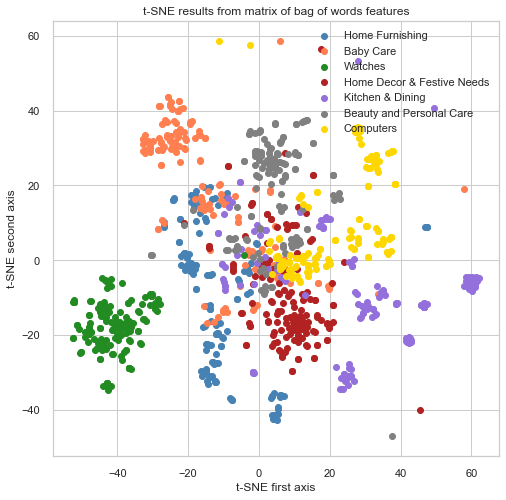

In [113]:
bow_tsne2,  bow_tsne2_cat = tsne_categories(bow_df, df["category_tree1"], learning_rate=10, perplexity=15, n_components=2)

3 clusters are rather correctly separated (watches and baby care), the others are not well separated, although the products belonging to the same categories are orften close from each other.

fit time: 0.617s 
inertia: 160337 
Silhouette score: 0.430 
Davies-Bouldin score:0.754


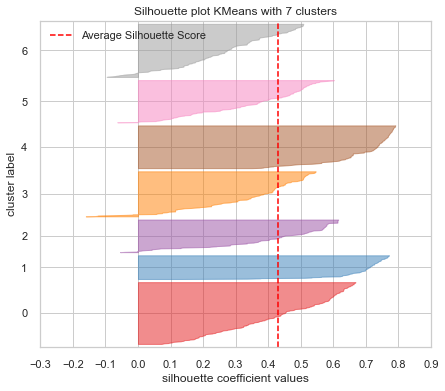

In [114]:
bow_tsne2_kmeans_labels, bow_tsne2_kmeans_centroids = kmeans_simple(bow_tsne2[["axis_1", "axis_2"]], n_clusters=7)

Although the silhouette score and Davies-Boulin scores are not very good, most clusters are well distinct. Except clusters1-2-3 that show important overlap.
t-SNE reduction to **3 dimensions** and corresponding KMeans clustering.

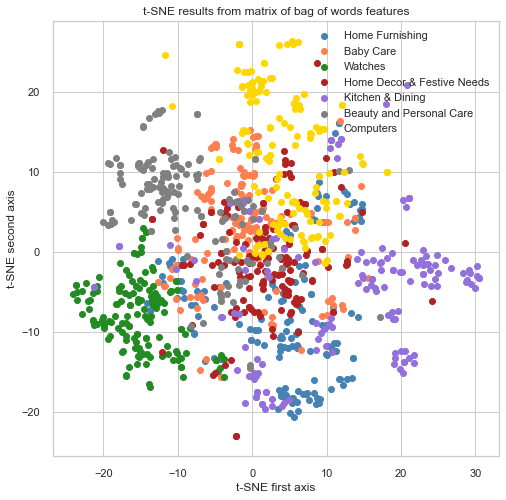

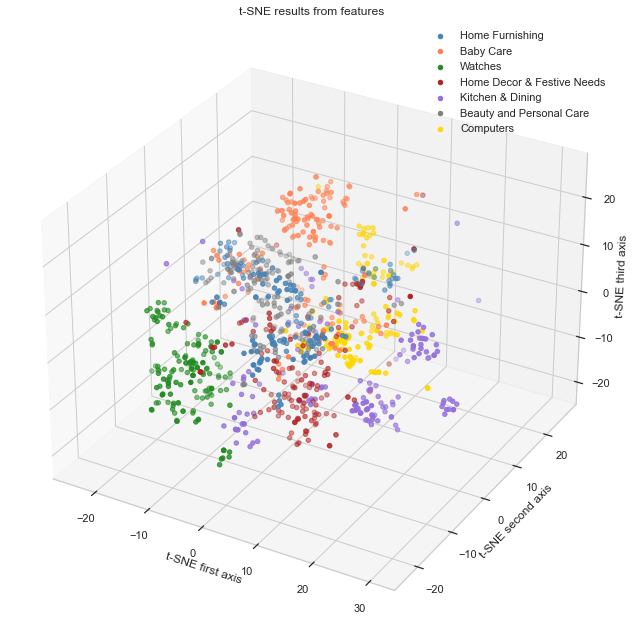

In [115]:
bow_tsne3, bow_tsne3_cat = tsne_categories(bow_df, df["category_tree1"], n_components=3, learning_rate=20, perplexity=10)

The detection of categories is better with 3 dimensions (in the 2D visualization the clusters seem less well separated, but this is because we do not see the third dimension here). The clusters are more homogeneous.

fit time: 0.697s 
inertia: 97478 
Silhouette score: 0.321 
Davies-Bouldin score:0.998


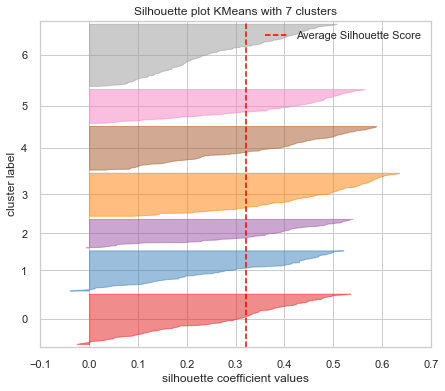

In [116]:
bow_tsne3_kmeans_labels, bow_tsne3_kmeans_centroids = kmeans_simple(bow_tsne3[["axis_1", "axis_2", "axis_3"]], n_clusters=7)

The results of the KMeans are also better, with a better individualisation fo the clusters (no overlap), although the score are lower than with 2 dimensions.

In [118]:
categories_comparison(txt_clean, "kmeans_labels_bow", bow_tsne3_kmeans_labels, "category_tree1")

Cluster 0
Home Furnishing               111
Baby Care                      27
Home Decor & Festive Needs     15
Kitchen & Dining               11
Beauty and Personal Care       11
Name: category_tree1, dtype: int64 

Cluster 1
Computers                     100
Beauty and Personal Care       16
Home Decor & Festive Needs     12
Kitchen & Dining                9
Baby Care                       3
Name: category_tree1, dtype: int64 

Cluster 2
Kitchen & Dining              82
Baby Care                      9
Computers                      5
Home Decor & Festive Needs     3
Name: category_tree1, dtype: int64 

Cluster 3
Watches    150
Name: category_tree1, dtype: int64 

Cluster 4
Beauty and Personal Care      97
Home Furnishing               16
Baby Care                     14
Kitchen & Dining              14
Home Decor & Festive Needs    10
Computers                      1
Name: category_tree1, dtype: int64 

Cluster 5
Baby Care                     87
Home Furnishing               23
Home

In [119]:
cat_names = ["Home Decor & Festive Needs", "Beauty and Personal Care", "Computers", "Watches", 
    "Baby Care", "Home Furnishing", "Kitchen & Dining"]

clusters_to_true_labels(txt_clean, "kmeans_labels_bow", "kmeans_labels_bow_names", cat_names)

In [121]:
ari_bow = adjusted_rand_score(txt_clean["category_tree1"], txt_clean["kmeans_labels_bow_names"])
print(f"The adjusted rand score is {ari_bow:.2f}.")

The adjusted rand score is 0.45.


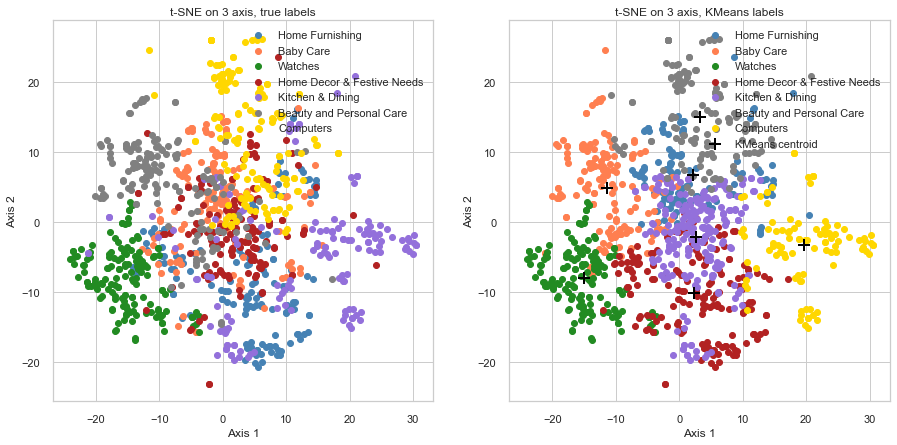

In [122]:
comparison_graph_categories(bow_tsne3, bow_tsne3_cat, 3, categories, 
    txt_clean["kmeans_labels_bow_names"], bow_tsne3_kmeans_centroids)

Comparing true labels and clustering labels, we see well categorized clusters at the periphery, and less accurate clustering in the middle.
### With tf-idf
#### KMeans with 200 features used directly
here we use directly the first 200 tf-idf features **without** dimension reduction.


fit time: 1.536s 
inertia: 697 
Silhouette score: 0.184 
Davies-Bouldin score:2.148


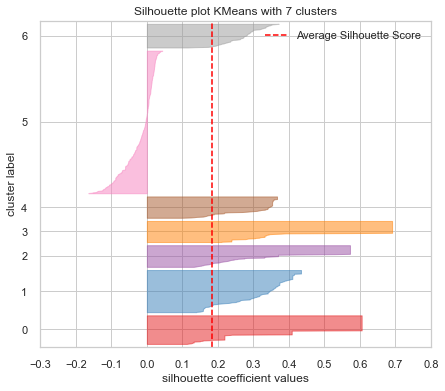

In [123]:
tf_idf_200_labels, tf_idf_200_centroids = kmeans_simple(tf_idf_200, 7)

In [124]:
categories_comparison(txt_clean, "kmeans_labels_tfidf_200", tf_idf_200_labels, "category_tree1")

Cluster 0
Computers                     52
Beauty and Personal Care      23
Kitchen & Dining              18
Baby Care                      6
Home Decor & Festive Needs     1
Name: category_tree1, dtype: int64 

Cluster 1
Watches    147
Name: category_tree1, dtype: int64 

Cluster 2
Home Decor & Festive Needs    75
Beauty and Personal Care       1
Name: category_tree1, dtype: int64 

Cluster 3
Beauty and Personal Care    74
Name: category_tree1, dtype: int64 

Cluster 4
Kitchen & Dining    74
Baby Care            1
Name: category_tree1, dtype: int64 

Cluster 5
Home Furnishing               150
Computers                      98
Home Decor & Festive Needs     74
Baby Care                      60
Kitchen & Dining               58
Beauty and Personal Care       52
Watches                         3
Name: category_tree1, dtype: int64 

Cluster 6
Baby Care    83
Name: category_tree1, dtype: int64 



In [125]:
cat_names = ["Home Furnishing", "Watches", "Kitchen & Dining", "Home Decor & Festive Needs", "Computers", 
     "Beauty and Personal Care", "Baby Care"]

clusters_to_true_labels(txt_clean, "kmeans_labels_tfidf_200", "kmeans_labels_tfidf_200_names", cat_names)

In [127]:
ari_tf_idf_200 = adjusted_rand_score(txt_clean["category_tree1"], txt_clean["kmeans_labels_tfidf_200_names"])
print(f"The adjusted rand score is {ari_tf_idf_200:.2f}.")

The adjusted rand score is 0.28.


The resulting ARI score is quite low, around 30% of products only are correctly classified.
KMeans with 3 t-SNE features (2500 tf-idf features reducted on 3 t-SNE dimensions)

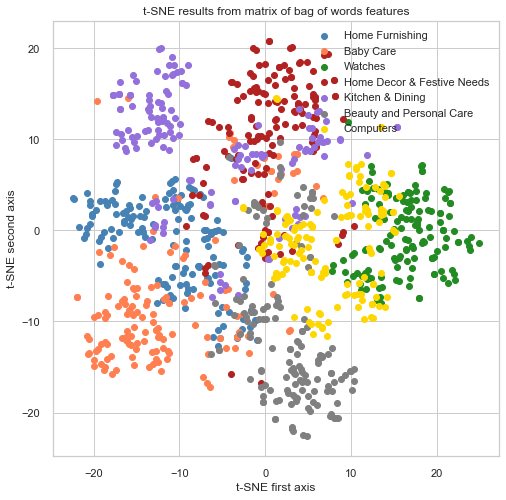

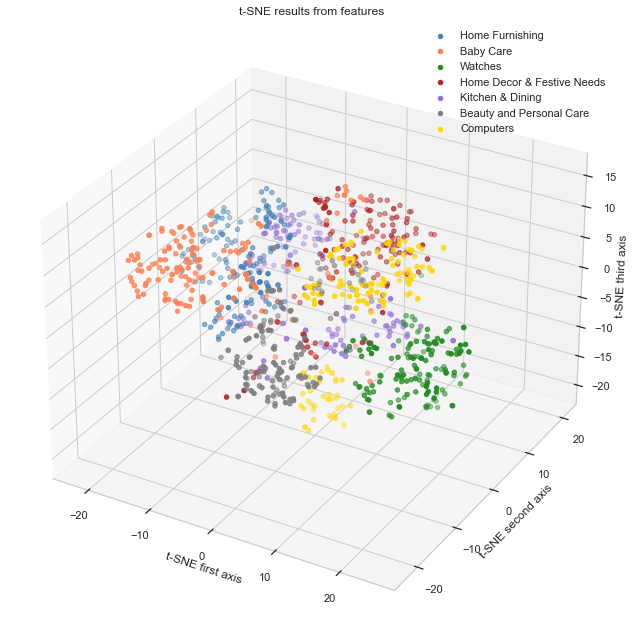

In [129]:
tf_idf_tsne3, tf_idf_tsne3_cat = tsne_categories(tf_idf_df, df["category_tree1"], n_components=3, learning_rate=10)

fit time: 0.593s 
inertia: 63001 
Silhouette score: 0.354 
Davies-Bouldin score:0.899


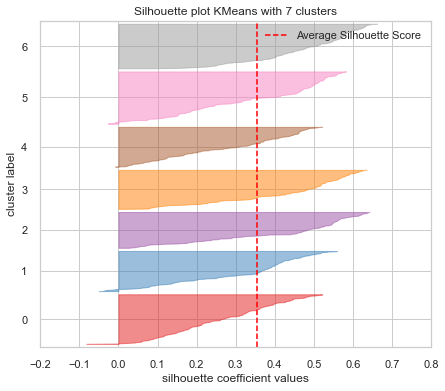

In [130]:
tf_idf_tsne3_kmeans_labels, tf_idf_tsne3_kmeans_centroids = kmeans_simple(tf_idf_tsne3[["axis_1", "axis_2", "axis_3"]], n_clusters=7)

In [131]:
categories_comparison(txt_clean, "kmeans_labels_tfidf_tsne3", tf_idf_tsne3_kmeans_labels, "category_tree1")

Cluster 0
Kitchen & Dining              84
Home Furnishing               76
Baby Care                      8
Home Decor & Festive Needs     5
Name: category_tree1, dtype: int64 

Cluster 1
Kitchen & Dining              53
Computers                     45
Home Decor & Festive Needs    21
Beauty and Personal Care      10
Baby Care                      7
Home Furnishing                4
Name: category_tree1, dtype: int64 

Cluster 2
Beauty and Personal Care      114
Computers                       4
Home Furnishing                 3
Home Decor & Festive Needs      2
Baby Care                       2
Name: category_tree1, dtype: int64 

Cluster 3
Home Decor & Festive Needs    109
Beauty and Personal Care        9
Baby Care                       7
Computers                       5
Kitchen & Dining                4
Watches                         1
Home Furnishing                 1
Name: category_tree1, dtype: int64 

Cluster 4
Computers                     96
Beauty and Personal Care      1

In [132]:
cat_names = ["Watches", "Beauty and Personal Care", "Home Decor & Festive Needs", "Home Furnishing", "Computers", 
    "Baby Care", "Kitchen & Dining"]

clusters_to_true_labels(txt_clean, "kmeans_labels_tfidf_tsne3", "kmeans_labels_tfidf_tsne3_names", cat_names)

In [133]:
ari_tf_idf = adjusted_rand_score(txt_clean["category_tree1"], txt_clean["kmeans_labels_tfidf_tsne3_names"])
print(f"The adjusted rand score is {ari_tf_idf:.2f}.")

The adjusted rand score is 0.51.


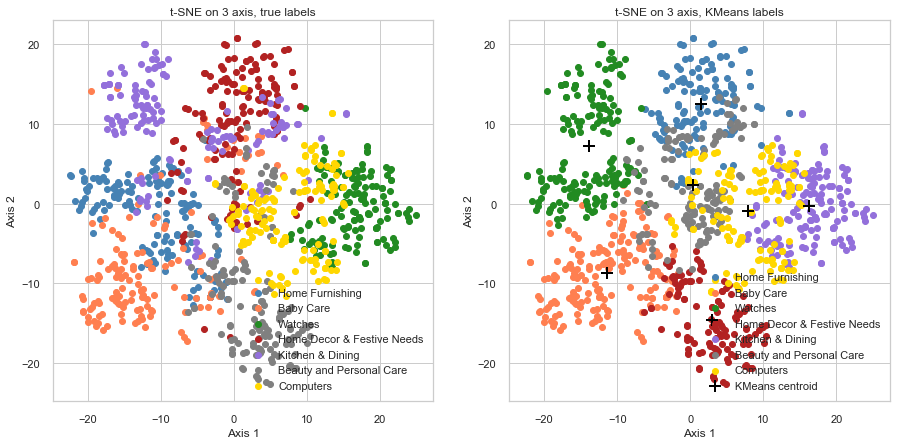

In [134]:
comparison_graph_categories(tf_idf_tsne3, tf_idf_tsne3_cat, 3, categories, txt_clean["kmeans_labels_tfidf_tsne3_names"], 
    tf_idf_tsne3_kmeans_centroids)

Using more tf-idf features reducted with t-SNE yield better results, with about 46% of product well categorized.
#### KMeans with 3 features (200 features from tf-idf reducted on 3 t-SNE dimensions)

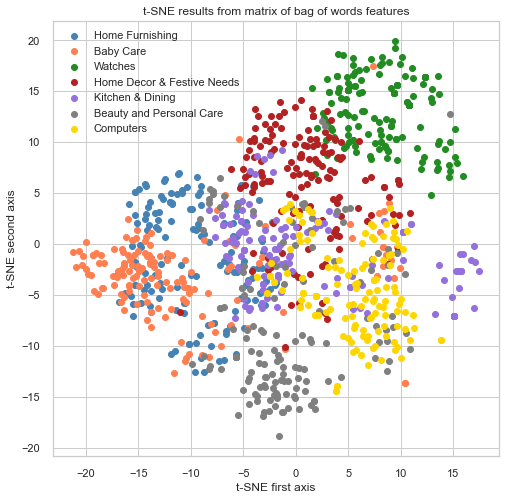

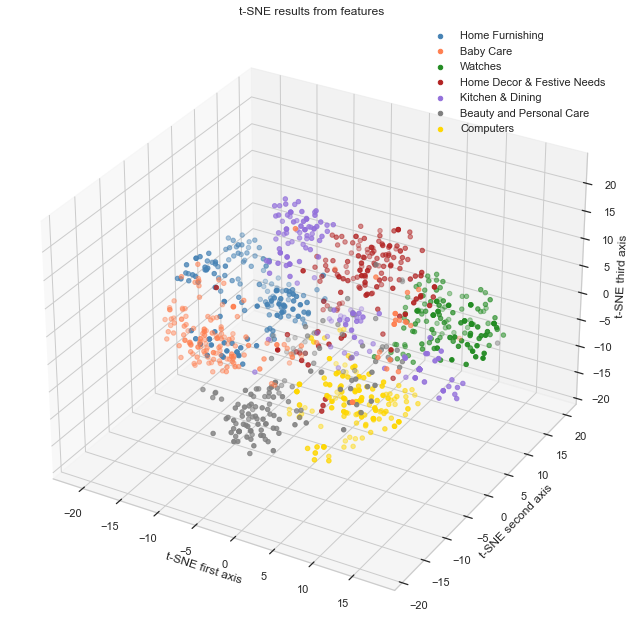

In [135]:
tf_idf_tsne3_200, tf_idf_tsne3_cat_200 = tsne_categories(tf_idf_200, df["category_tree1"], n_components=3, perplexity=50, learning_rate=20)

fit time: 0.701s 
inertia: 49762 
Silhouette score: 0.354 
Davies-Bouldin score:0.963


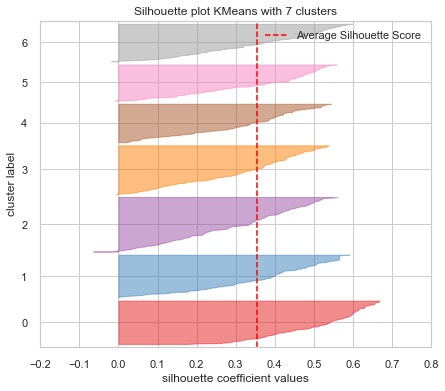

In [136]:
tf_idf_200_tsne3_kmeans_labels, tf_idf_200_tsne3_kmeans_centroids = kmeans_simple(tf_idf_tsne3_200[["axis_1", "axis_2", "axis_3"]], n_clusters=7)

In [137]:
categories_comparison(txt_clean, "kmeans_labels_tfidf_200_tsne3", tf_idf_200_tsne3_kmeans_labels, "category_tree1")

Cluster 0
Watches                     149
Baby Care                     1
Beauty and Personal Care      1
Name: category_tree1, dtype: int64 

Cluster 1
Computers                     52
Kitchen & Dining              50
Beauty and Personal Care      24
Baby Care                     14
Home Decor & Festive Needs     9
Name: category_tree1, dtype: int64 

Cluster 2
Baby Care                     107
Home Furnishing                71
Beauty and Personal Care       11
Home Decor & Festive Needs      1
Name: category_tree1, dtype: int64 

Cluster 3
Home Decor & Festive Needs    125
Kitchen & Dining               12
Home Furnishing                12
Beauty and Personal Care       12
Baby Care                       5
Computers                       3
Name: category_tree1, dtype: int64 

Cluster 4
Computers                     93
Beauty and Personal Care      14
Kitchen & Dining              12
Baby Care                      7
Home Decor & Festive Needs     7
Watches                        1
Nam

In [138]:
cat_names = ["Computers", "Kitchen & Dining", "Watches", "Baby Care", "Home Decor & Festive Needs", 
    "Beauty and Personal Care", "Home Furnishing"]

clusters_to_true_labels(txt_clean, "kmeans_labels_tfidf_200_tsne3", "kmeans_labels_tfidf_200_tsne3_names", cat_names)

In [140]:
ari_tf_idf_200_tsne3 = adjusted_rand_score(txt_clean["category_tree1"], txt_clean["kmeans_labels_tfidf_200_tsne3_names"])
print(f"The adjusted rand score is {ari_tf_idf_200_tsne3:.2f}.")

The adjusted rand score is 0.46.


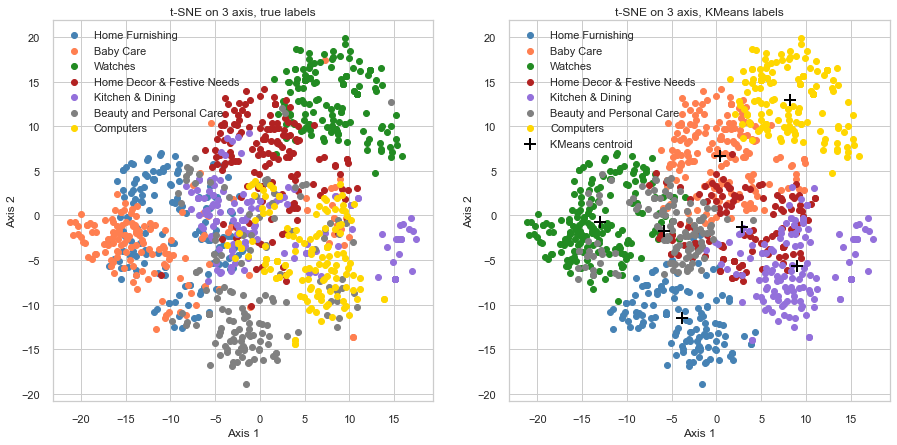

In [141]:
comparison_graph_categories(tf_idf_tsne3_200, tf_idf_tsne3_cat_200, 3, categories, 
    txt_clean["kmeans_labels_tfidf_200_tsne3_names"], tf_idf_200_tsne3_kmeans_centroids)

We can even use only the first 200 tf-idf features and still have 46% of correctly categorized products.
#### CPA on the 200 features tf-idf

In [142]:
n_comp = 200

X = tf_idf_200.values
noms = tf_idf_200.index
features = tf_idf_200.columns

# Main axes calculation
acp = PCA(n_components=n_comp)
acp.fit(X)

PCA(n_components=200)

### Word-embedding
#### Word2Vec
The cleaned, lemmatized and tokenized words we will use:

In [143]:
clean_corpus

[['elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtainkey',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'height',
  'curtain',
  'enhance',
  'look',
  'interior',
  'curtain',
  'make',
  'high',
  'quality',
  'polyester',
  'fabric',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ring',
  'make',
  'room',
  'environment',
  'romantic',
  'love',
  'curtain',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparance',
  'give',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'surreal',
  'attention',
  'sure',
  'steal',
  'heart',
  'contemporary',
  'eyelet',
  'valance',
  'curtain',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welcome',
  'bright',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'morn

In [144]:
# Define our parameters' model:
model = Word2Vec(sentences=clean_corpus, min_count=5)

In [145]:
# One example of a vectorized word:
vect_computer = model.wv['computer']
print(f"vector size: {vect_computer.size}")
vect_computer

vector size: 100


array([ 0.1342881 , -0.18731678, -0.22084422, -0.17019023, -0.01444165,
        0.1182487 , -0.01142226, -0.03136408, -0.02393017, -0.01804319,
       -0.0294829 , -0.04868627,  0.11030587, -0.15230598,  0.08596561,
        0.02490004,  0.1391983 , -0.05908038, -0.0156824 , -0.01075263,
       -0.03268548,  0.23775695, -0.10522428,  0.07980809,  0.00176461,
       -0.06666305,  0.23109457,  0.01435441,  0.0102255 ,  0.08616272,
        0.10105308,  0.00648794,  0.01983809, -0.18419734, -0.25055173,
        0.13459063, -0.08662254,  0.2554213 , -0.00434919,  0.11094562,
       -0.1777159 , -0.24861948,  0.05775955, -0.06415612,  0.07323162,
       -0.08344793,  0.09107585,  0.04373534, -0.08228555, -0.23236139,
        0.16377686, -0.03844346, -0.0448602 ,  0.13611409,  0.01990573,
       -0.02751755, -0.24757993, -0.05803277, -0.1101305 , -0.01763417,
       -0.03806547,  0.04356577,  0.11627691, -0.0246225 , -0.08967976,
        0.11662658, -0.19502003,  0.00374792, -0.10414418,  0.04

In [146]:
# Similarity between words of the corpus:
print(f"Cotton - elegance : {model.wv.similarity('cotton', 'elegance')}")
print(f"Cotton - computer : {model.wv.similarity('cotton', 'computer')}")
print(f"Cotton - baby : {model.wv.similarity('cotton', 'baby')}")

Cotton - elegance : 0.9580948352813721
Cotton - computer : 0.9736224412918091
Cotton - baby : 0.9339842796325684


We notice that we have the same order of similarity between cotton and computer and cotton and elegance...strange.

In [147]:
# First 10 words in the model:
for index, word in enumerate(model.wv.vocab.keys()):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.vocab.keys())} is {word}")

word #0/1574 is elegance
word #1/1574 is polyester
word #2/1574 is multicolor
word #3/1574 is abstract
word #4/1574 is eyelet
word #5/1574 is door
word #6/1574 is curtainkey
word #7/1574 is curtain
word #8/1574 is floral
word #9/1574 is height


In [148]:
print(f"We have {len(model.wv.vocab)} words in our word2vec vocabulary.")
#print(f"We have {len(model.wv)} words in our word2vec vocabulary.")

We have 1574 words in our word2vec vocabulary.


In [149]:
# Select words that are only in the Word2Vec vocabulary
clean_corpus_wv = clean_corpus.copy()
for i in range(len(clean_corpus)):
    clean_corpus_wv[i] = [w for w in clean_corpus[i] if w in model.wv.vocab.keys()]

In [150]:
# Now we replace each word of each document by its vector and calculate the mean vector for each document.
def mean_document_vector(corpus, model, vector_size, keyed_vector=False):
    """
    Calculate the mean vector of a document from word2vec model.
    Take in input the text corpus, the word2vec model, the vector size 
    and if the model is in keyded vector format or not.
    Return an array containing the documents vectors.
    """
    all_doc_vec = []

    for doc in corpus:
        # Create zeros matrix size of document x size of word vector
        document = np.zeros((len(doc), vector_size))

        # Replace zeros by the word vectors
        for position, word in enumerate(doc):
            if keyed_vector:
                document[position] = model[word]
            else:
                document[position] = model.wv[word]

        # Make mean for each document
        doc_vec_mean = document.mean(axis=0)
        all_doc_vec.append(doc_vec_mean)

    all_doc_vec = np.asarray(all_doc_vec)

    return all_doc_vec

In [151]:
all_doc_vec = mean_document_vector(clean_corpus_wv, model, 100)

fit time: 1.923s 
inertia: 168 
Silhouette score: 0.374 
Davies-Bouldin score:0.921


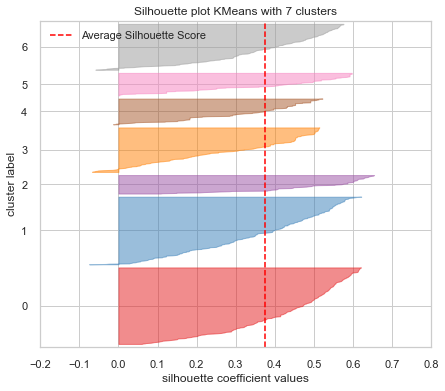

In [152]:
# Use our document vectors as input in the KMeans (100 features)
word2vec_kmeans_labels, word2vec_kmeans_centroids = kmeans_simple(all_doc_vec, n_clusters=7)

In [153]:
categories_comparison(txt_clean, "kmeans_labels_word2vec", word2vec_kmeans_labels, "category_tree1")

Cluster 0
Home Decor & Festive Needs    63
Home Furnishing               52
Beauty and Personal Care      44
Computers                     39
Kitchen & Dining              37
Baby Care                     27
Watches                        4
Name: category_tree1, dtype: int64 

Cluster 1
Beauty and Personal Care      74
Computers                     58
Home Decor & Festive Needs    53
Kitchen & Dining              32
Baby Care                     17
Home Furnishing                1
Name: category_tree1, dtype: int64 

Cluster 2
Watches                       64
Home Decor & Festive Needs     1
Name: category_tree1, dtype: int64 

Cluster 3
Kitchen & Dining              60
Home Furnishing               57
Computers                     19
Baby Care                     10
Home Decor & Festive Needs     5
Watches                        2
Beauty and Personal Care       2
Name: category_tree1, dtype: int64 

Cluster 4
Computers                     33
Beauty and Personal Care      23
Home Decor

Categories are too messed up to make a correspondance with true categories and calculate an ARI score.
##### Using t-SNE before KMeans to reduce the 100 dimensions to 3 dimensions.


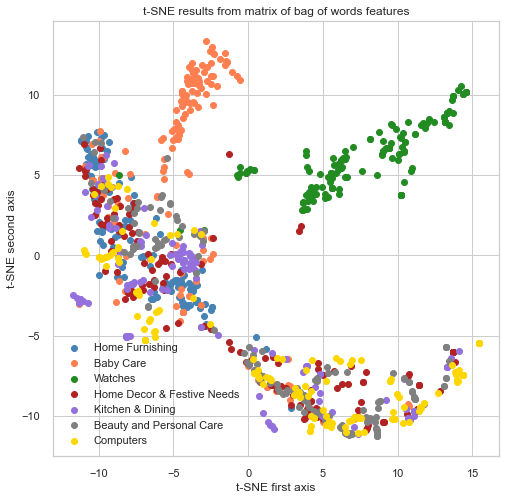

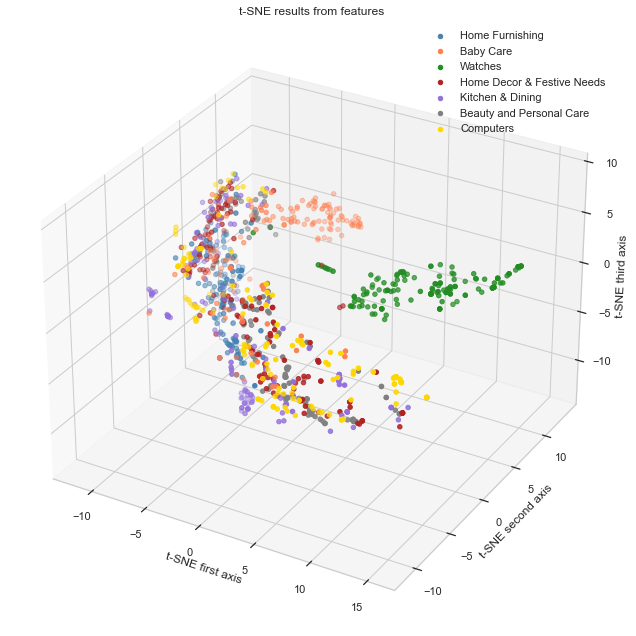

In [154]:
word2vec_tsne, word2vec_tsne_cat = tsne_categories(all_doc_vec, df["category_tree1"], learning_rate=50, n_components=3)

We can see 3-4 partly well separated clusters, but with a large cluster mixing all categories in the center. The results are not very concluant.

fit time: 1.583s 
inertia: 17172 
Silhouette score: 0.438 
Davies-Bouldin score:0.842


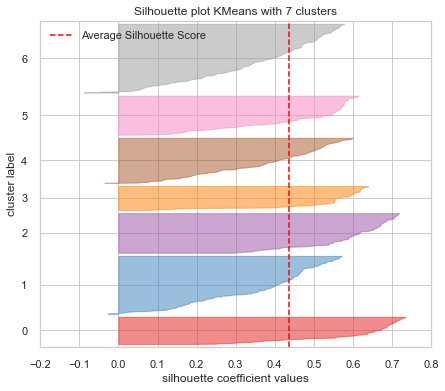

In [155]:
word2vec_tsne3_kmeans_labels, word2vec_tsne3_kmeans_centroids = kmeans_simple(word2vec_tsne[["axis_1", "axis_2", "axis_3"]], n_clusters=7)

In [156]:
categories_comparison(txt_clean, "kmeans_labels_word2vec_tsne3", word2vec_tsne3_kmeans_labels, "category_tree1")


Cluster 0
Baby Care                     82
Watches                       11
Home Decor & Festive Needs     1
Beauty and Personal Care       1
Name: category_tree1, dtype: int64 

Cluster 1
Beauty and Personal Care      63
Computers                     49
Home Decor & Festive Needs    44
Kitchen & Dining              27
Baby Care                     15
Home Furnishing                3
Name: category_tree1, dtype: int64 

Cluster 2
Watches                       136
Home Decor & Festive Needs      2
Name: category_tree1, dtype: int64 

Cluster 3
Kitchen & Dining              36
Home Furnishing               36
Baby Care                      6
Computers                      5
Home Decor & Festive Needs     1
Name: category_tree1, dtype: int64 

Cluster 4
Home Furnishing               66
Kitchen & Dining              23
Baby Care                     21
Home Decor & Festive Needs    21
Computers                     18
Beauty and Personal Care       7
Watches                        1
Name: ca

In [157]:
cat_names = ["Watches", "Beauty and Personal Care", "Kitchen & Dining", "Baby Care", 
    "Computers", "Home Decor & Festive Needs", "Home Furnishing"]

clusters_to_true_labels(txt_clean, "kmeans_labels_word2vec_tsne3", "kmeans_labels_word2vec_tsne3_names", cat_names)


In [159]:

ari_word2vec_tsne3 = adjusted_rand_score(txt_clean["category_tree1"], txt_clean["kmeans_labels_word2vec_tsne3_names"])
print(f"The adjusted rand score is {ari_word2vec_tsne3:.2f}.")

The adjusted rand score is 0.23.


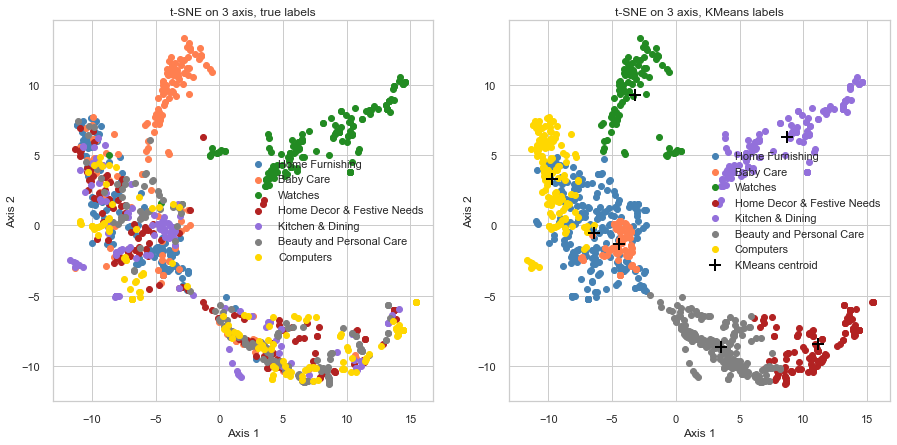

In [160]:
comparison_graph_categories(word2vec_tsne, word2vec_tsne_cat, 3, categories, 
    txt_clean["kmeans_labels_word2vec_tsne3_names"], word2vec_tsne3_kmeans_centroids)

With an ARI of 0.25, the results are better than without t-SNE, but not so great.

Doc2Vec words representation
Let's try to get an image of the similarities of the corpus words. We will reduce their vectors dimensions and represent them in 2D with t-SNE

In [161]:
def word2vec_tsne(model, nb_dim):

    """
    Operate a t-SNE with the specified number of dimensions on the vectors of Word2Vec specified model.
    Return x and y coordinates on the t-SNE axis and corresponding words.
    """

    # Extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    words = list(model.wv.vocab.keys())

    # Reduce using t-SNE
    tsne = TSNE(n_components=nb_dim, random_state=0)
    vectors = tsne.fit_transform(vectors)

    # Get t-SNE coordinates and corresponding words
    x_val = [v[0] for v in vectors]
    y_val = [v[1] for v in vectors]

    return x_val, y_val, words

In [162]:
x_val, y_val, words = word2vec_tsne(model, 2)
# Select 30 words at random in the corpus:
random.seed(5)
indices = list(range(len(words)))
selected_indices = random.sample(indices, 25)

Text(0, 0.5, '1st t-SNE axis')

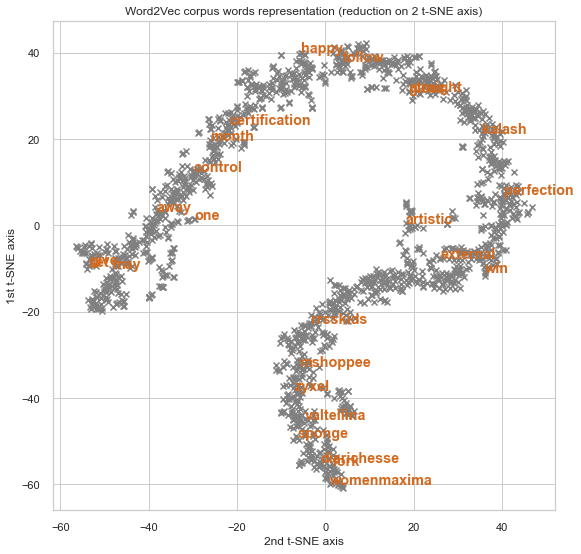

In [163]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.scatter(x_val, y_val, marker="x", color="grey")
for i in selected_indices:
        ax.annotate(words[i], (x_val[i], y_val[i]), fontsize="large", color="chocolate", fontweight="semibold")
ax.set_title("Word2Vec corpus words representation (reduction on 2 t-SNE axis)")
ax.set_xlabel("2nd t-SNE axis")
ax.set_ylabel("1st t-SNE axis")

In [164]:
trace_data = go.Scatter(x=x_val, y=y_val, mode="markers", text=words,
                        marker=dict(size=10, color="steelblue", line_color="white", line_width=1))

fig = go.Figure(data=trace_data)

fig.update_layout(title_text = "Word2Vec corpus words representation (reduction on 2 t-SNE axis)",
                    width=650, height=650,
                    xaxis=dict(linecolor='black', linewidth=1),
                    yaxis=dict(linecolor='black', linewidth=1),
                    margin=dict(l=50, r=50,b=50,t=80, pad=4))

fig.show()

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



With pre-trained Word2Vec models
Instead of training the word2vec model on our dataset, we will use a pre-trained model.

In [165]:
# Get the available models
info = gensim_api.info()

for model_name, model_data in sorted(info['models'].items()):
    print('%s (%d records): %s' % (model_name, model_data.get('num_records', -1), 
        model_data['description'][:80] + '...',))

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors of the movie matrix....
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets, 27B tokens, 1.2M vocab, uncased (https:...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https:/...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https:/...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https:/...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2014 + Gigaword 5.6B tokens, 400K vocab, ...
glove-wik

In [166]:
# More infos on the W2V Google News model:
word2vec_google_news_300_info = gensim_api.info("word2vec-google-news-300")
print(json.dumps(word2vec_google_news_300_info, indent=4))

{
    "num_records": 3000000,
    "file_size": 1743563840,
    "base_dataset": "Google News (about 100 billion words)",
    "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/word2vec-google-news-300/__init__.py",
    "license": "not found",
    "parameters": {
        "dimension": 300
    },
    "description": "Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. The phrases were obtained using a simple data-driven approach described in 'Distributed Representations of Words and Phrases and their Compositionality' (https://code.google.com/archive/p/word2vec/).",
    "read_more": [
        "https://code.google.com/archive/p/word2vec/",
        "https://arxiv.org/abs/1301.3781",
        "https://arxiv.org/abs/1310.4546",
        "https://www.microsoft.com/en-us/research/publication/linguistic-regularities-in-continuous-space-word-representatio

In [167]:
# Load model
w2v_GN_300 = gensim_api.load("word2vec-google-news-300")

In [168]:
common_vocabulary = set(vocabulary) & set(w2v_GN_300.vocab.keys())
print(f"{len(common_vocabulary)} words of our corpus are in the Google pre-trained model, equivalent to {len(common_vocabulary)*100/len(vocabulary):.2f} %.")

3561 words of our corpus are in the Google pre-trained model, equivalent to 6.90 %.


In [169]:
#Very few of our words are in the pre-trained model, but since we will use only the most frequent words, that should be enough.
# Select words that are only in Word2Vec pre-trained vocabulary
clean_corpus_wv_google = clean_corpus.copy()
for i in range(len(clean_corpus)):
    clean_corpus_wv_google[i] = [w for w in clean_corpus[i] if w in w2v_GN_300.vocab.keys()]

In [170]:
# Get mean vectors for each document
all_doc_vec_gn300 = mean_document_vector(clean_corpus_wv_google, w2v_GN_300, 300, keyed_vector=True)

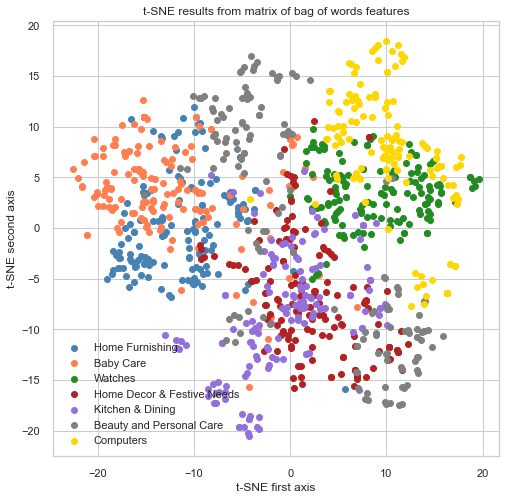

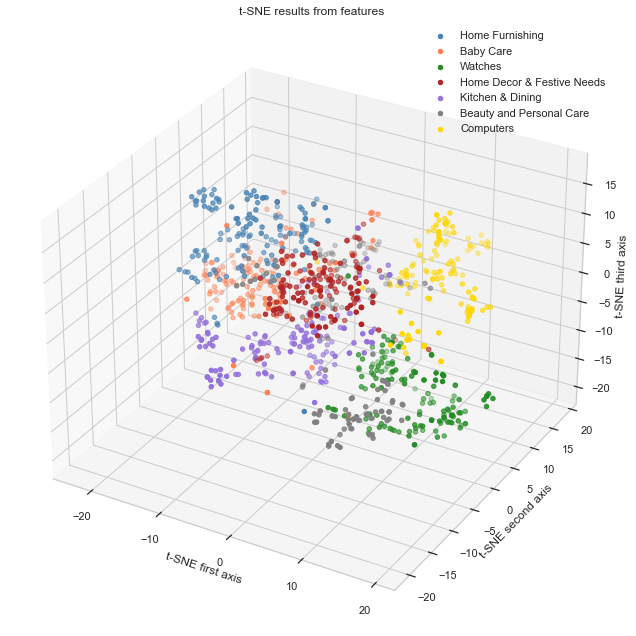

In [172]:
w2v_gn300_tsne, w2v_gn300_tsne_cat = tsne_categories(all_doc_vec_gn300, df["category_tree1"], n_components=3, learning_rate=20, perplexity=20)

fit time: 2.110s 
inertia: 57183 
Silhouette score: 0.368 
Davies-Bouldin score:0.967


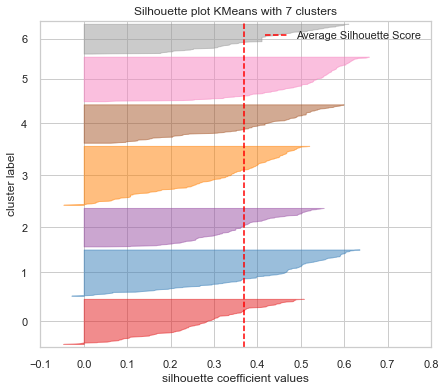

In [173]:
w2v_gn300_tsne3_kmeans_labels, w2v_gn300_tsne3_kmeans_centroids = kmeans_simple(w2v_gn300_tsne[["axis_1", "axis_2", "axis_3"]], n_clusters=7)

In [175]:
categories_comparison(txt_clean, "kmeans_labels_w2v_gn300_tsne3", w2v_gn300_tsne3_kmeans_labels, "category_tree1")

Cluster 0
Kitchen & Dining              118
Home Decor & Festive Needs     21
Baby Care                       8
Beauty and Personal Care        6
Home Furnishing                 4
Name: category_tree1, dtype: int64 

Cluster 1
Computers                     122
Home Decor & Festive Needs     11
Baby Care                      11
Beauty and Personal Care        9
Kitchen & Dining                7
Watches                         1
Name: category_tree1, dtype: int64 

Cluster 2
Home Furnishing    124
Baby Care            9
Computers            1
Name: category_tree1, dtype: int64 

Cluster 3
Baby Care                     118
Beauty and Personal Care       63
Home Furnishing                19
Kitchen & Dining                3
Home Decor & Festive Needs      2
Name: category_tree1, dtype: int64 

Cluster 4
Home Decor & Festive Needs    112
Beauty and Personal Care       10
Kitchen & Dining                7
Baby Care                       3
Home Furnishing                 2
Name: category_tree

In [176]:
cat_names = ["Baby Care", "Watches", "Home Decor & Festive Needs", "Beauty and Personal Care", "Computers", 
    "Kitchen & Dining", "Home Furnishing"]

clusters_to_true_labels(txt_clean, "kmeans_labels_w2v_gn300_tsne3", "kmeans_labels_w2v_gn300_tsne3_names", cat_names)

In [178]:
ari_w2v_gn300_tsne3 = adjusted_rand_score(txt_clean["category_tree1"], txt_clean["kmeans_labels_w2v_gn300_tsne3_names"])
print(f"The adjusted rand score is {ari_w2v_gn300_tsne3:.2f}.")

The adjusted rand score is 0.58.


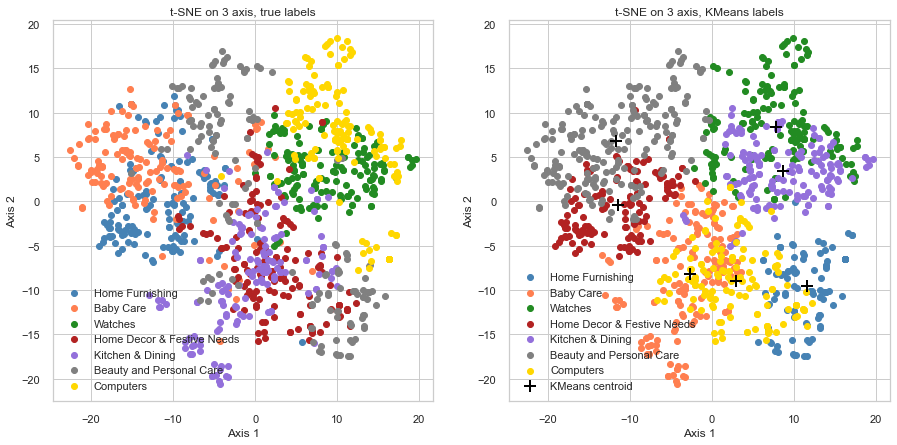

In [179]:
comparison_graph_categories(w2v_gn300_tsne, w2v_gn300_tsne_cat,3, categories, 
    txt_clean["kmeans_labels_w2v_gn300_tsne3_names"], w2v_gn300_tsne3_kmeans_centroids)

Here we got ARI=0.58 which is the best score of all trials we made. We see from the comparison that clusters are roughly well identified, except in the central region and the upper part of the "beauty and personal care" (grey) cluster.
#### Doc2Vec
Now we will try the Doc2Vec model that directly compute a vector per document, and off course training it on our own corpus for  that purpose.

In [180]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]

# Build model and vocabulary:
model = Doc2Vec(min_count=3, vector_size=300, epochs=40)
model.build_vocab(documents)

# Train model (on the whole corpus)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

In [182]:
def doc2vec_simple(corpus, min_count=3, epochs=20, vector_size=100):
    """
    Compute Doc2Vec algorithm on the corpus with indicated parameters:
    - min_count (int) minimum number of occurences of a word to be included in the doc2vec
    - epochs (int) number of iterations of the model
    - vector_size (int) number of vectors to build for each documentation
    Return an array of size N x vector_size (with N number of documents in the corpus).
    """
    # Tag the documents and words of each document in the corpus:
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]

    # Build model and vocabulary:
    model = Doc2Vec(min_count=min_count, vector_size=vector_size, epochs=epochs)
    model.build_vocab(documents)

    # Train model (on the whole corpus)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

    # Append vectors in a matrix:
    dv_matrix = model[0]
    for i in range(1, len(documents)):
        dv_matrix = np.vstack([dv_matrix, model[i]])

    return dv_matrix, model

##### Doc2Vec  with `vector_size=300`, t-SNE, then KMeans

In [183]:
# Making a model with 300 size vectors
dv_matrix_300, model = doc2vec_simple(clean_corpus, min_count=3, vector_size=300, epochs=40)

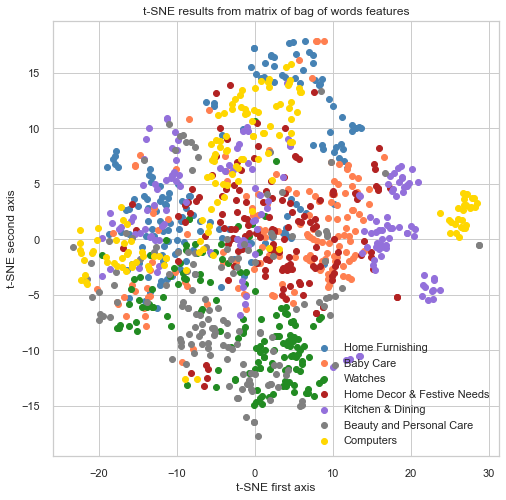

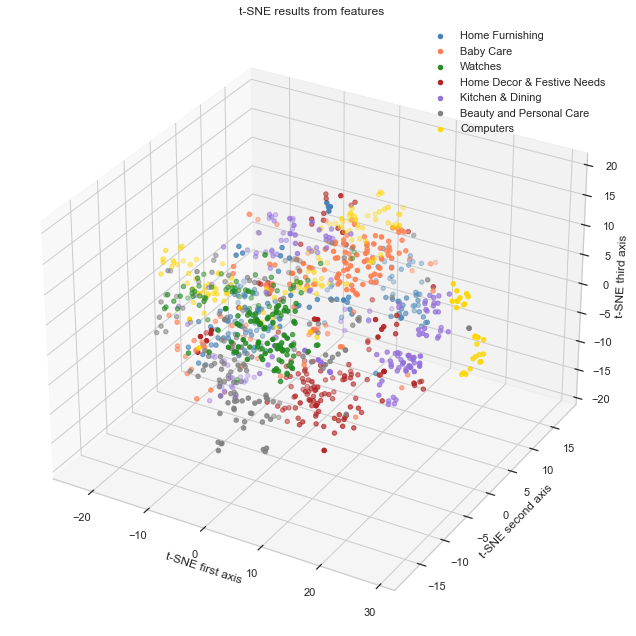

In [186]:
dv_300_tsne3, dv_300_tsne3_cat = tsne_categories(dv_matrix_300, df["category_tree1"], n_components=3, learning_rate=20, perplexity=20)

fit time: 3.912s 
inertia: 58724 
Silhouette score: 0.311 
Davies-Bouldin score:1.058


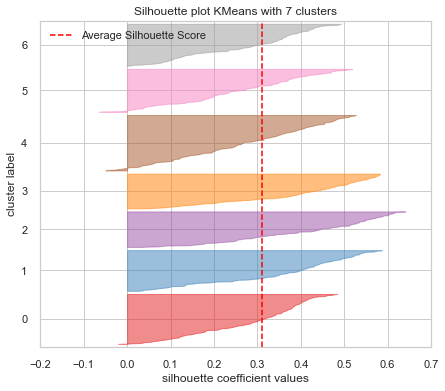

In [188]:
d2v_300_tsne3_kmeans_labels, d2v_300_tsne3_kmeans_centroids = kmeans_simple(dv_300_tsne3[["axis_1", "axis_2", "axis_3"]], 7)

In [189]:
categories_comparison(txt_clean, "kmeans_labels_d2v_300_tsne3", d2v_300_tsne3_kmeans_labels, "category_tree1")

Cluster 0
Computers                     46
Watches                       44
Beauty and Personal Care      31
Kitchen & Dining              28
Home Furnishing               10
Baby Care                      8
Home Decor & Festive Needs     7
Name: category_tree1, dtype: int64 

Cluster 1
Baby Care                     87
Kitchen & Dining              16
Home Furnishing               13
Beauty and Personal Care       8
Watches                        7
Home Decor & Festive Needs     6
Computers                      5
Name: category_tree1, dtype: int64 

Cluster 2
Home Decor & Festive Needs    97
Baby Care                     14
Beauty and Personal Care       9
Home Furnishing                2
Kitchen & Dining               1
Computers                      1
Name: category_tree1, dtype: int64 

Cluster 3
Kitchen & Dining              63
Computers                     27
Home Decor & Festive Needs    16
Home Furnishing                9
Beauty and Personal Care       3
Baby Care               

In [190]:
cat_names = ["Home Decor & Festive Needs", "Watches", "Kitchen & Dining", "Beauty and Personal Care", "Home Furnishing", 
    "Baby Care", "Computers"]

clusters_to_true_labels(txt_clean, "kmeans_labels_d2v_300_tsne3", "kmeans_labels_d2v_300_tsne3_names", cat_names)

In [192]:
ari_doc2vec_tsne3 = adjusted_rand_score(txt_clean["category_tree1"], txt_clean["kmeans_labels_d2v_300_tsne3_names"])
print(f"The adjusted rand score is {ari_doc2vec_tsne3:.2f}.")

The adjusted rand score is 0.23.


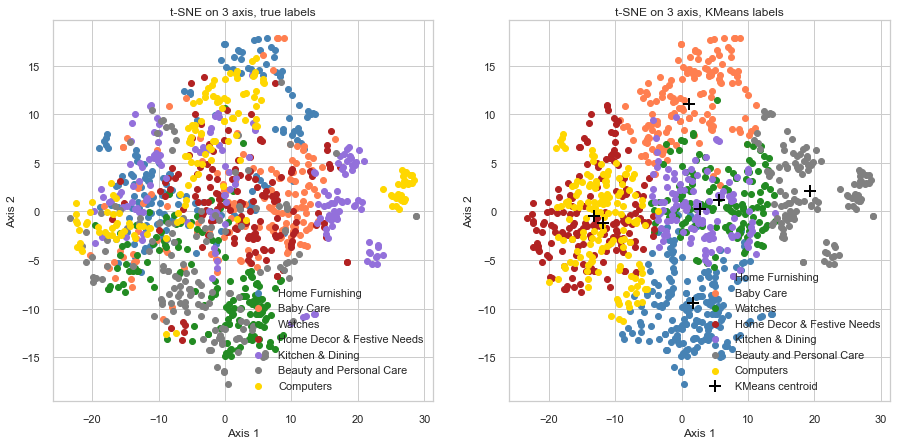

In [193]:
comparison_graph_categories(dv_300_tsne3, dv_300_tsne3_cat, 3, categories, 
    txt_clean["kmeans_labels_d2v_300_tsne3_names"], d2v_300_tsne3_kmeans_centroids)

The score is quite low compared to the results of the Doc2Vec approach.
##### Doc2Vec with `vector_size=50`, then KMeans

In [194]:
# Same as before, but with smaller vectors
dv_matrix_50, model = doc2vec_simple(clean_corpus, min_count=3, vector_size=50, epochs=40)

fit time: 4.963s 
inertia: 6556 
Silhouette score: 0.246 
Davies-Bouldin score:2.255


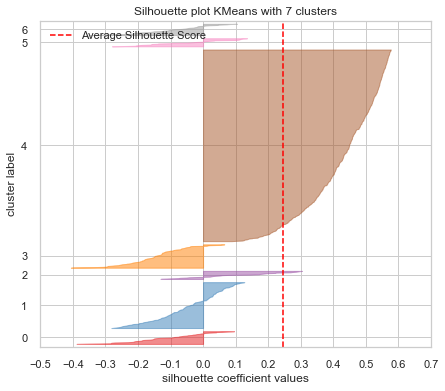

In [195]:
doc2vec_50_kmeans_labels, doc2vec_50_kmeans_centroids = kmeans_simple(dv_matrix_50, 7)

Used directly in KMeans the 500-sized vectors give very disproportioned clusters.
##### Doc2Vec with `vector_size=50`, t-SNE, then KMeans

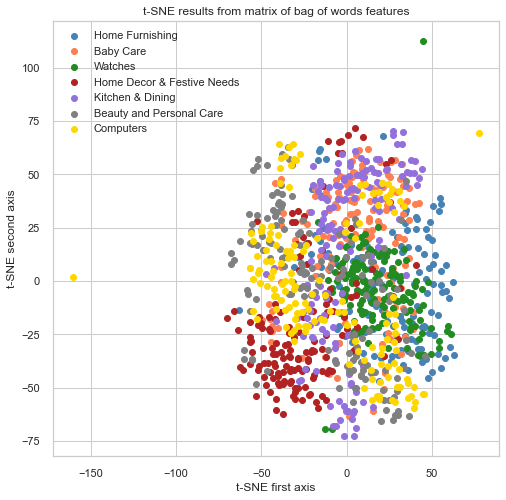

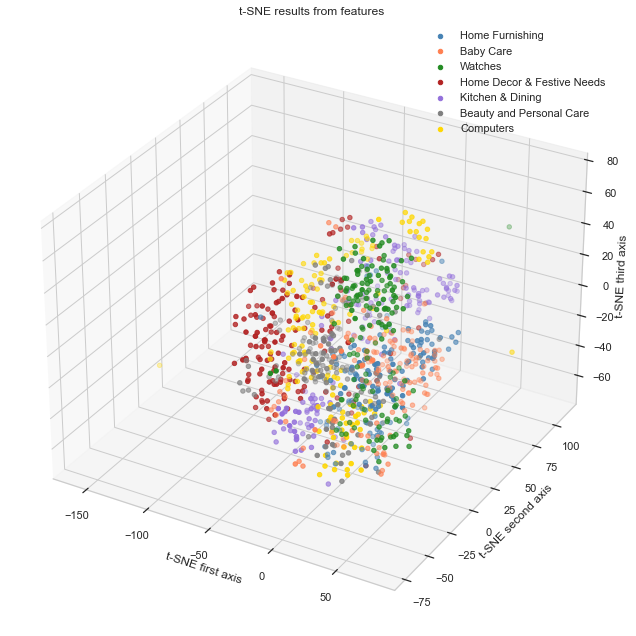

In [196]:
dv_50_tsne3, dv_50_tsne3_cat = tsne_categories(dv_matrix_50, df["category_tree1"], n_components=3)

fit time: 0.604s 
inertia: 921008 
Silhouette score: 0.274 
Davies-Bouldin score:1.030


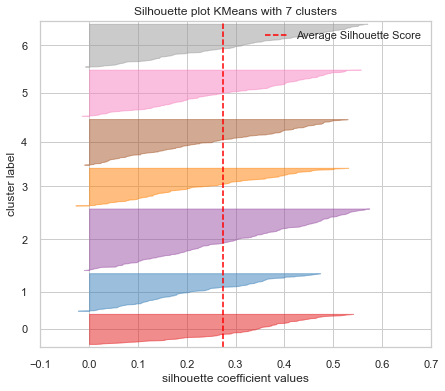

In [197]:
d2v_50_tsne3_kmeans_labels, d2v_50_tsne3_kmeans_centroids = kmeans_simple(dv_50_tsne3[["axis_1", "axis_2", "axis_3"]], 7)

In [198]:
categories_comparison(txt_clean, "kmeans_labels_d2v_50_tsne3", d2v_50_tsne3_kmeans_labels, "category_tree1")

Cluster 0
Kitchen & Dining              68
Computers                     18
Home Decor & Festive Needs    12
Home Furnishing                3
Watches                        2
Beauty and Personal Care       1
Baby Care                      1
Name: category_tree1, dtype: int64 

Cluster 1
Beauty and Personal Care      47
Kitchen & Dining              26
Computers                     18
Home Furnishing               17
Baby Care                     17
Home Decor & Festive Needs     5
Watches                        1
Name: category_tree1, dtype: int64 

Cluster 2
Home Furnishing               55
Computers                     45
Watches                       41
Beauty and Personal Care      30
Kitchen & Dining              20
Baby Care                     18
Home Decor & Festive Needs     5
Name: category_tree1, dtype: int64 

Cluster 3
Computers                     53
Beauty and Personal Care      30
Kitchen & Dining              19
Home Decor & Festive Needs    13
Baby Care               

In [199]:
cat_names = ["Watches", "Beauty and Personal Care", "Home Decor & Festive Needs", "Kitchen & Dining",
    "Baby Care", "Computers", "Home Furnishing"]

clusters_to_true_labels(txt_clean, "kmeans_labels_d2v_50_tsne3", "kmeans_labels_d2v_50_tsne3_names", cat_names)

In [201]:
ari_doc2vec50_tsne3 = adjusted_rand_score(txt_clean["category_tree1"], txt_clean["kmeans_labels_d2v_50_tsne3_names"])
print(f"The adjusted rand score is {ari_doc2vec50_tsne3:.2f}.")

The adjusted rand score is 0.21.


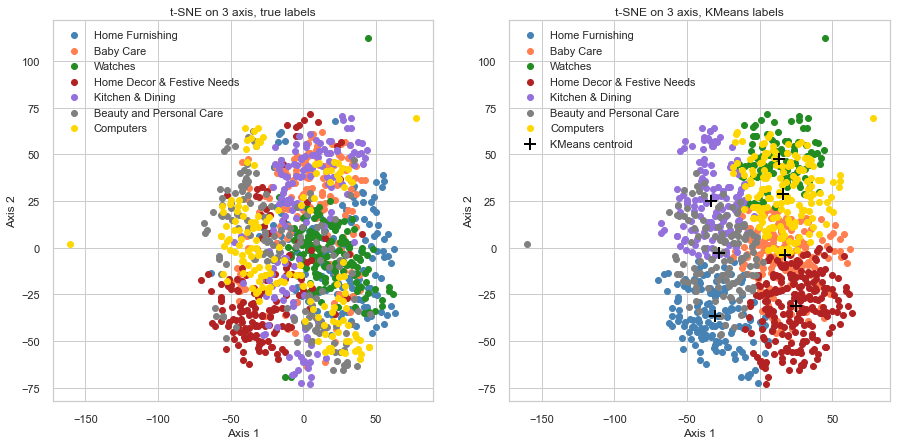

In [202]:
comparison_graph_categories(dv_50_tsne3, dv_50_tsne3_cat, 3, categories, 
    txt_clean["kmeans_labels_d2v_50_tsne3_names"], d2v_50_tsne3_kmeans_centroids)

The result is slightly better than with 300 size vectors, but not as good as Word2Vec approach.

## Computer vision

In [162]:
file_path = "Images/"

In [168]:
file_path

'Images/'

# Load images

# Load images
from PIL import Image
# filenames = [img for img in glob.glob(path_to_images_folder + "/*.jpg")]
img_filenames = txt_clean["image"]
img_paths = [file_path + img for img in img_filenames]
img_base = [Image.open(img) for img in img_paths]

In [203]:
%store txt_clean

Stored 'txt_clean' (DataFrame)


In [184]:
# Load images

# Load images
from PIL import Image
# filenames = [img for img in glob.glob(path_to_images_folder + "/*.jpg")]
img_filenames = txt_clean["image"]
img_paths = [file_path + "\\" + img for img in img_filenames]
img_base = [cv2.imread(img) for img in img_paths]


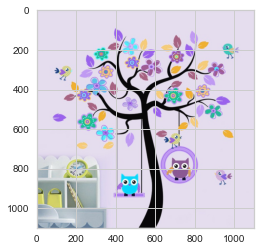

In [186]:
# Example first image
plt.imshow(img_base[-1]);

ORB

In [187]:
path_example = file_path  + "55b85ea15a1536d46b7190ad6fff8ce7.jpg"
img_ex = cv2.imread(path_example)

# Convert tot grayscale and equalize
img_ex_nb = cv2.cvtColor(img_ex, cv2.COLOR_RGB2GRAY)
img_exa_nb = cv2.equalizeHist(img_ex_nb)

# ORB processing
orb_test = cv2.ORB_create()
kp, des = orb_test.detectAndCompute(img_ex_nb, None)
img_ex_kp = cv2.drawKeypoints(img_ex_nb, kp, np.array([]), (0, 0, 255), 
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Visualization of keypoints
#cv2.namedWindow('ORB_image', cv2.WINDOW_NORMAL)
#cv2.resizeWindow('ORB_image', 1000, 1000)
#cv2.imshow('ORB_processing_example', img_ex_kp)
#cv2.waitKey()
#cv2.destroyAllWindows()

# Image descriptors
des

array([[207,  81, 199, ..., 191,  41,  80],
       [ 53, 255, 219, ..., 251, 240, 177],
       [ 88,  60,  63, ..., 194, 230,  59],
       ...,
       [ 40, 233, 118, ..., 156, 206, 170],
       [175, 168, 243, ..., 205,  39, 246],
       [ 93, 191, 146, ..., 196, 236, 125]], dtype=uint8)

In [188]:
# Preprocess images: grayscale and equalize
img_orb = [cv2.cvtColor(img_base[i], cv2.COLOR_RGB2GRAY) for i in range(len(img_base))]
img_orb = [cv2.equalizeHist(img_orb[i]) for i in range(len(img_orb))]

In [189]:
def ORB_hist_tsne(images, kmeans_n_clusters, nfeatures=500, WTA_K=2, scale_factor=1.2, k="sqrt", 
    batch_size=1024, mbatch_max_iter=1000, n_comp=2, method="barnes_hut", init="pca", n_jobs=-2, 
    learning_rate=200, perplexity=30, random_state=None):
    """
    Use ORB algorithm to extract descriptors from input images.
    Group the descriptors with MiniBatch KMeans.
    Make histograms from the clustering results.
    Reduce histogram dimensions with t-SNE.
    Use t-SNE results in a KMeans to cluster images.
    Return the images histograms, the kmeans object and t-SNE results.

    images: iterable containing preprocessed images
    kmeans_n_clusters (int): number of categories to use for images clustering

    ORB parameters
    nfeatures (int): max number of features to select per image
    WTA_K (int): number of points that produce each element of the oriented BRIEF descriptor.
    scale_factor (float): pyramid decimation ratio (> 1)

    MiniBatch KMeans parameters:
    k: "sqrt", "10-times" or int. Number of clusters. If "sqrt", take the squared root of the 
        number of descriptors. If "10-time", take 10 times the number of image categories. 
        Or specify number of clusters (int).
    batch_size (int): MiniBatch size
    mbatch_max_iter (int): Max number of iterations

    t-SNE parameters
    n_comp (int): number of components
    method (str): "barnes_hut" (by default) or "exact"
    init (str): initialisation, default is "pca"
    n_jobs (int): The number of parallel jobs to run for neighbors search.
    learning_rate (int): Usually in the range [10.0, 1000.0].
    perplexity (int): Related to the number of nearest neighbors that is used in other 
    manifold learning algorithms. Usually in the range [5.0, 50.0].
    """

    # Create ORB object
    orb = cv2.ORB_create(nfeatures=nfeatures, WTA_K=WTA_K, scaleFactor=scale_factor)

    # Get descriptors in an array, each line being a descriptor
    _, des = orb.detectAndCompute(images[0], None)
    for i in range(1, len(images)):
        _, des_new = orb.detectAndCompute(images[i], None)
        des = np.vstack([des, des_new])
    
    print(f"We have a total of {des.shape[0]} descriptors. Each descriptor is a vector with {des.shape[1]} values.")

    # Select number of clusters
    if k=="sqrt":
        k = int(round(np.sqrt(len(des))))
    if k=="10-times":
        k = 10 * kmeans_n_clusters
    if type(k) is int:
        pass
    
    print(f"We will use {k} clusters to group the descriptors.")
    
    # Using Mini Batch KMeans to cluster the descriptors
    t0 = time()
    mb_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=mbatch_max_iter, random_state=random_state).fit(des)
    t1 = time()-t0
    print(f"Mini Batch KMeans fit time : {t1:.2f}s.")

    # Make an histogram for each image containing the number of descriptors attributed to each clusters
    histograms = np.zeros((len(images), k))

    # For each image
    for i in range(len(images)):

        img_hist = np.zeros(k)
        # Get descriptors, predict their cluster
        _, img_des = orb.detectAndCompute(images[i], None)
        nb_des = len(img_des)
        clusters_des = mb_kmeans.predict(img_des)
        if nb_des==0:
            print(f"No image descriptors at image {i}")
        # For each descriptor, increases the corresponding cluster count by one
        # Normalize by the number of descriptors of the image (in case it varies between images) 
        for j in clusters_des:
            img_hist[j] += 1/nb_des

        # Replace the zeros by the image histogram in the numpy array
        histograms[i] = img_hist
    
    print(f"Computed {histograms.shape[0]} histograms of length {histograms.shape[1]}.")
    
    # t_SNE dimensions reduction and visualization
    tsne_results = TSNE(n_components=n_comp, init=init, method=method, n_jobs=n_jobs, random_state=random_state, 
        learning_rate=learning_rate, perplexity=perplexity).fit_transform(histograms)
    
    # Kmeans on t-SNE results
    t0 = time()
    kmeans = KMeans(n_clusters=kmeans_n_clusters,random_state=random_state).fit(tsne_results)
    t1 = time()-t0
    print(f"KMeans fit time : {t1:.2f}s.")

    # Plot silhouettes
    fig, ax = plt.subplots(figsize=(7, 6))
    visualizer = SilhouetteVisualizer(KMeans(kmeans_n_clusters, random_state=0),
        title=f'Silhouette plot KMeans with {kmeans_n_clusters} clusters')
    visualizer.fit(tsne_results)
    visualizer.finalize()

    # Improve t-SNE results visualization and add KMeans labels
    tsne_results = pd.DataFrame(tsne_results)
    names_col = {}
    names = ["axis_1", "axis_2", "axis_3", "axis_4", "axis_5", "axis_6", "axis_7", "axis_8", "axis_9", "axis_10"]
    for i, name in enumerate(names):
        names_col[i] = name
    tsne_results.rename(columns=names_col, inplace=True)
    tsne_results["kmeans_labels"] = kmeans.labels_

    # Plot t-SNE results with KMeans labels
    fig, ax = plt.subplots(figsize=(8, 8))

    sns.scatterplot(ax=ax, x=tsne_results["axis_1"], y=tsne_results["axis_2"], hue=tsne_results["kmeans_labels"], palette=sns.color_palette("husl", 7))
    ax.set_title("t-SNE results from matrix of bag of visual words features (ORB)")
    ax.set_xlabel("t-SNE first axis")
    ax.set_ylabel("t-SNE second axis")
    ax.legend();

    return histograms, kmeans, tsne_results


In [190]:
def comparison_graph_categories_cv(tsne_results, true_labels, n_comp_tsne, categories, kmeans_labels_names, 
    kmeans_centroids=None):
    """
    """
    if n_comp_tsne>10:
        print("Too many t-SNE axis!")

    axis_names = ["axis_1", "axis_2", "axis_3", "axis_4", "axis_5", "axis_6", "axis_7", "axis_8","axis_9", "axis_10"]
    cols_kmeans = axis_names[:n_comp_tsne] + ["kmeans_labels"]
    cols_truecat = axis_names[:n_comp_tsne] + ["cat"]
    short_names = ["furnishing", "baby", "watches", "decor", "kitchen", "beauty", "computers"]

    # Add true labels and KMeans labels names to t-SNE results dataframe
    tsne_results["kmeans_labels_names"] = kmeans_labels_names
    tsne_results["cat"] = true_labels

    # Make dict according to true categories and KMeans labelling for plotting
    tsne_categorized = {}
    kmeans_labels_dict = {}
    
    for short_name, long_name in zip(short_names, categories):
        tsne_categorized[short_name] = tsne_results[tsne_results["cat"]==long_name][cols_truecat]

    for short_name, long_name  in zip(short_names, categories):
        kmeans_labels_dict[short_name] = tsne_results[tsne_results["kmeans_labels_names"]==long_name][cols_kmeans]

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    datas_p1 = [tsne_categorized["furnishing"], tsne_categorized["baby"], tsne_categorized["watches"], tsne_categorized["decor"], 
        tsne_categorized["kitchen"], tsne_categorized["beauty"], tsne_categorized["computers"]]
    datas_p2 = [kmeans_labels_dict["furnishing"], kmeans_labels_dict["baby"], kmeans_labels_dict["watches"], kmeans_labels_dict["decor"], 
        kmeans_labels_dict["kitchen"], kmeans_labels_dict["beauty"], kmeans_labels_dict["computers"]]
    colors = ["steelblue", "coral", "forestgreen", "firebrick", "mediumpurple", "grey", "gold"]

    for data, color, label in zip(datas_p1, colors, categories):
        ax1.scatter(data["axis_1"], data["axis_2"], color=color, label=label)
    ax1.set_title(f't-SNE on {n_comp_tsne} axis, true labels')
    ax1.set_xlabel('Axis 1')
    ax1.set_ylabel('Axis 2')
    ax1.legend()

    for data, color, label in zip(datas_p2, colors, categories):
        ax2.scatter(data["axis_1"], data["axis_2"], color=color, label=label)
    if kmeans_centroids is not None:
        ax2.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker="+", color="black", 
            linewidth=2, s=150, zorder=3, label="KMeans centroid")
    ax2.set_title(f't-SNE on {n_comp_tsne} axis, KMeans labels')
    ax2.set_xlabel('Axis 1')
    ax2.set_ylabel('Axis 2')
    ax2.legend();

In [191]:
results_computer_vision =  txt_clean[["image", "level_1"]].copy()

#### With basic parameters

We have a total of 520321 descriptors. Each descriptor is a vector with 32 values.
We will use 721 clusters to group the descriptors.
Mini Batch KMeans fit time : 57.62s.
Computed 1050 histograms of length 721.
KMeans fit time : 0.42s.


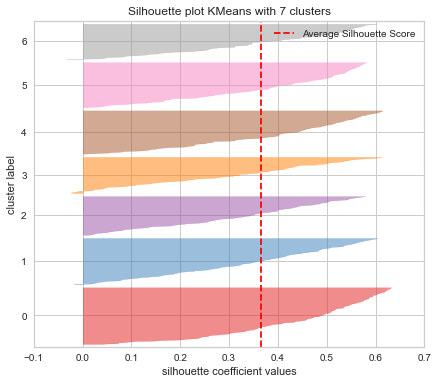

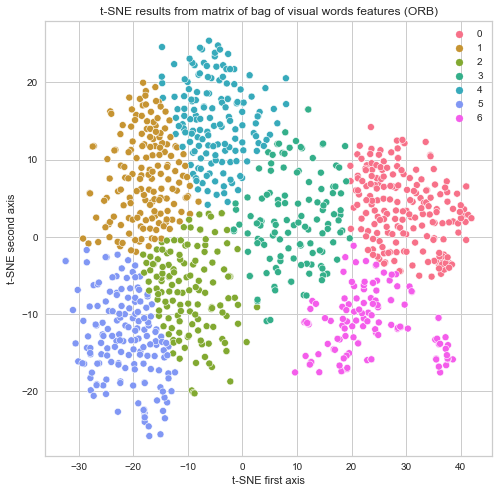

In [192]:
histograms_orb_base, kmeans_orb_base, tsne_results_orb_base = ORB_hist_tsne(img_orb, 7, random_state=0)

Example of the histogram of the first image :

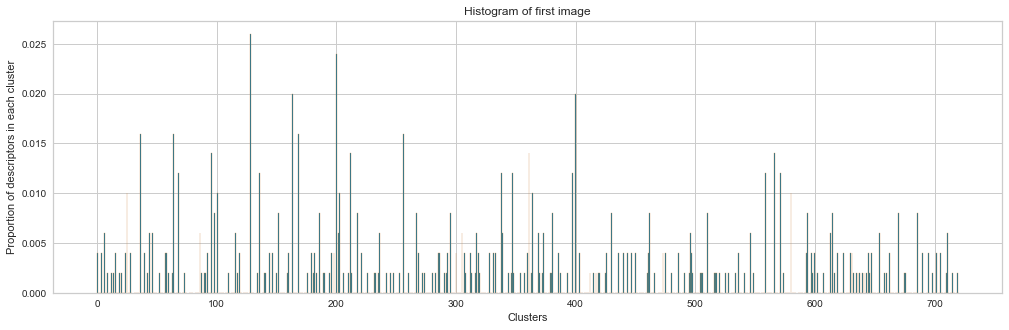

In [193]:
fig, ax = plt.subplots(figsize=(17,5))

ax.bar(x=range(0,721), height=histograms_orb_base[0], edgecolor="peru")
ax.set_title("Histogram of first image")
ax.set_xlabel("Clusters")
ax.set_ylabel("Proportion of descriptors in each cluster");

In [206]:
%store categories

Stored 'categories' (list)


In [207]:
%store w2v_gn300_tsne

Stored 'w2v_gn300_tsne' (DataFrame)


In [208]:
%store all_doc_vec_gn300

Stored 'all_doc_vec_gn300' (ndarray)


In [194]:
categories_comparison(results_computer_vision, "img_kmeans_labels_orb_tsne2", kmeans_orb_base.labels_, "level_1")

Cluster 0
Home Decor & Festive Needs    47
Kitchen & Dining              42
Computers                     35
Baby Care                     25
Beauty and Personal Care      20
Watches                       17
Home Furnishing               11
Name: level_1, dtype: int64 

Cluster 1
Home Furnishing               46
Beauty and Personal Care      33
Baby Care                     27
Home Decor & Festive Needs    21
Watches                       18
Kitchen & Dining               9
Computers                      7
Name: level_1, dtype: int64 

Cluster 2
Baby Care                     30
Home Furnishing               27
Watches                       26
Kitchen & Dining              14
Home Decor & Festive Needs    13
Computers                     13
Beauty and Personal Care      12
Name: level_1, dtype: int64 

Cluster 3
Watches                       27
Kitchen & Dining              24
Home Decor & Festive Needs    18
Baby Care                     17
Computers                     17
Home Furnish

In [195]:
cat_names = ["Home Decor & Festive Needs", "Home Furnishing", "Beauty and Personal Care",  "Baby Care", "Watches",
    "Kitchen & Dining", "Computers"]

clusters_to_true_labels(results_computer_vision, "img_kmeans_labels_orb_tsne2", "img_kmeans_labels_orb_tsne2_names", cat_names)

In [196]:
ari_orb_tsne2 = adjusted_rand_score(results_computer_vision["level_1"], results_computer_vision["img_kmeans_labels_orb_tsne2_names"])
print(f"The adjusted rand score is {ari_orb_tsne2:.2f}.")

The adjusted rand score is 0.03.


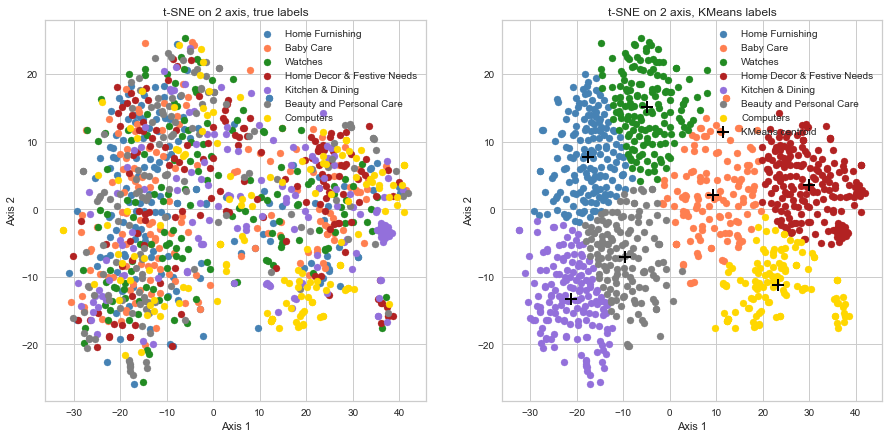

In [197]:
comparison_graph_categories_cv(tsne_results_orb_base, results_computer_vision["level_1"], 2, categories,
    results_computer_vision["img_kmeans_labels_orb_tsne2_names"], kmeans_orb_base.cluster_centers_)

The ARI score are very very low. We will look for better parameters.
#### `WTA_K= 4`, 10 t-SNE components

We have a total of 520321 descriptors. Each descriptor is a vector with 32 values.
We will use 721 clusters to group the descriptors.
Mini Batch KMeans fit time : 65.67s.
Computed 1050 histograms of length 721.
KMeans fit time : 0.13s.


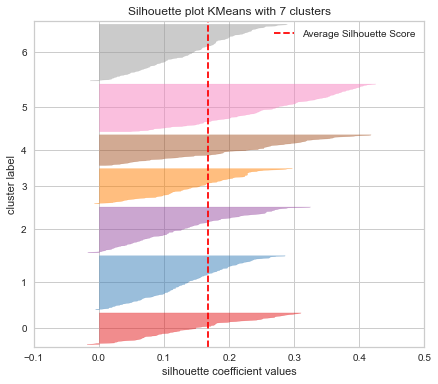

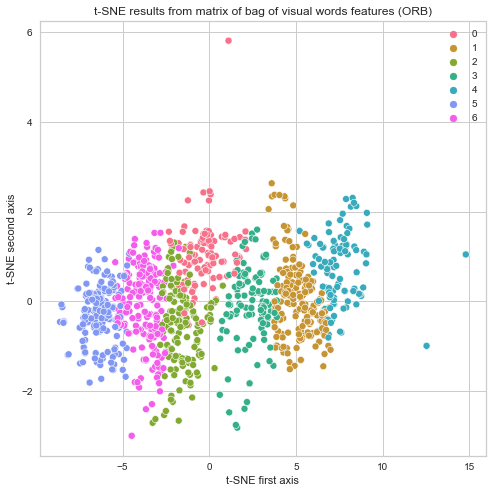

In [198]:
histo_orb_refined, kmeans_orb_refined, tsne_orb_refined = ORB_hist_tsne(img_orb, 7, WTA_K=4, n_comp=10, method="exact", 
    learning_rate=10, perplexity=20, random_state=0)

In [199]:
categories_comparison(results_computer_vision, "img_kmeans_labels_orb_refined", kmeans_orb_refined.labels_, "level_1")

Cluster 0
Kitchen & Dining              21
Home Decor & Festive Needs    19
Watches                       17
Home Furnishing               16
Computers                     15
Beauty and Personal Care      11
Baby Care                     11
Name: level_1, dtype: int64 

Cluster 1
Kitchen & Dining              41
Home Decor & Festive Needs    39
Baby Care                     28
Computers                     27
Watches                       24
Home Furnishing               16
Beauty and Personal Care      13
Name: level_1, dtype: int64 

Cluster 2
Home Furnishing               32
Baby Care                     30
Beauty and Personal Care      24
Watches                       21
Home Decor & Festive Needs    19
Computers                     18
Kitchen & Dining              15
Name: level_1, dtype: int64 

Cluster 3
Kitchen & Dining              27
Watches                       24
Home Decor & Festive Needs    22
Baby Care                     18
Computers                     14
Beauty and P

In [200]:
cat_names = ["Home Furnishing", "Home Decor & Festive Needs", "Beauty and Personal Care", "Watches", "Kitchen & Dining", 
    "Computers", "Baby Care"]

clusters_to_true_labels(results_computer_vision, "img_kmeans_labels_orb_refined", "img_kmeans_labels_orb_refined_names", cat_names)

In [201]:
ari_orb_tsne_refined = adjusted_rand_score(results_computer_vision["level_1"], 
    results_computer_vision["img_kmeans_labels_orb_refined_names"])
print(f"The adjusted rand score is {ari_orb_tsne_refined:.2f}.")

The adjusted rand score is 0.02.


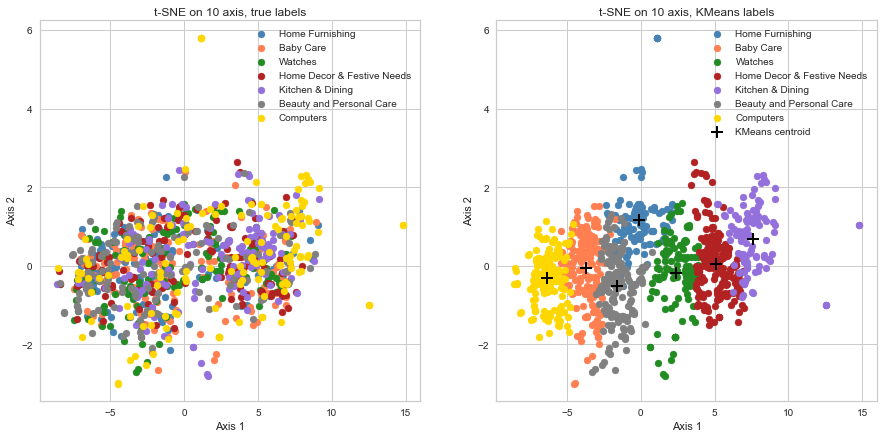

In [202]:
comparison_graph_categories_cv(tsne_orb_refined, results_computer_vision["level_1"], 10, categories,
    results_computer_vision["img_kmeans_labels_orb_refined_names"], kmeans_orb_refined.cluster_centers_)

Always bad results...
#### `WTA_K=2`, 10 t-SNE components

We have a total of 520321 descriptors. Each descriptor is a vector with 32 values.
We will use 721 clusters to group the descriptors.
Mini Batch KMeans fit time : 74.04s.
Computed 1050 histograms of length 721.
KMeans fit time : 2.13s.


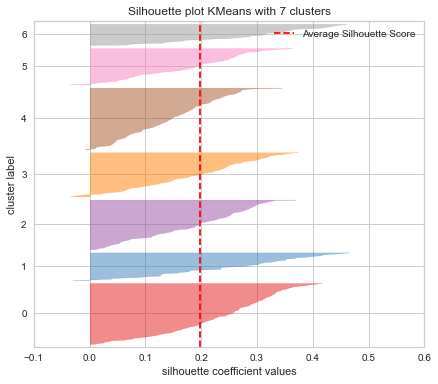

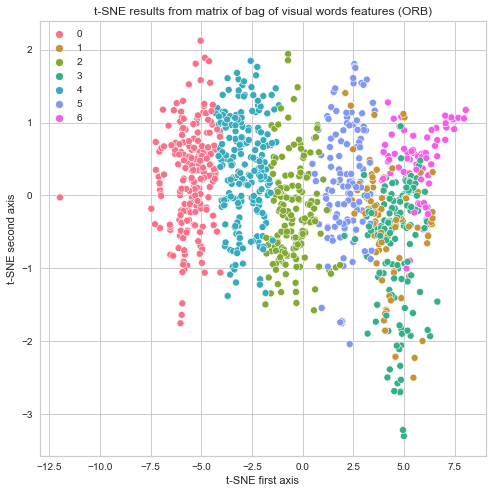

In [203]:
histo_orb_refined2, kmeans_orb_refined2, tsne_orb_refined2 = ORB_hist_tsne(img_orb, 7, n_comp=10, method="exact", 
learning_rate=10, perplexity=20, random_state=0)

In [204]:
categories_comparison(results_computer_vision, "img_kmeans_labels_orb_refined2", kmeans_orb_refined2.labels_, "level_1")

Cluster 0
Baby Care                     43
Beauty and Personal Care      42
Watches                       31
Home Furnishing               28
Computers                     23
Kitchen & Dining              23
Home Decor & Festive Needs    22
Name: level_1, dtype: int64 

Cluster 1
Computers                     50
Kitchen & Dining              15
Home Furnishing               12
Baby Care                      9
Home Decor & Festive Needs     5
Watches                        3
Beauty and Personal Care       2
Name: level_1, dtype: int64 

Cluster 2
Beauty and Personal Care      38
Home Decor & Festive Needs    30
Watches                       29
Kitchen & Dining              28
Home Furnishing               20
Computers                     16
Baby Care                     12
Name: level_1, dtype: int64 

Cluster 3
Home Decor & Festive Needs    48
Baby Care                     24
Kitchen & Dining              23
Beauty and Personal Care      19
Computers                     17
Watches     

In [205]:
cat_names = ["Watches", "Home Furnishing", "Baby Care", "Computers", "Beauty and Personal Care",
    "Kitchen & Dining", "Home Decor & Festive Needs"]

clusters_to_true_labels(results_computer_vision, "img_kmeans_labels_orb_refined2", 
    "img_kmeans_labels_orb_refined2_names", cat_names)

In [206]:
ari_orb_tsne_refined2 = adjusted_rand_score(results_computer_vision["level_1"], 
    results_computer_vision["img_kmeans_labels_orb_refined2_names"])
print(f"The adjusted rand score is {ari_orb_tsne_refined2:.2f}.")

The adjusted rand score is 0.04.


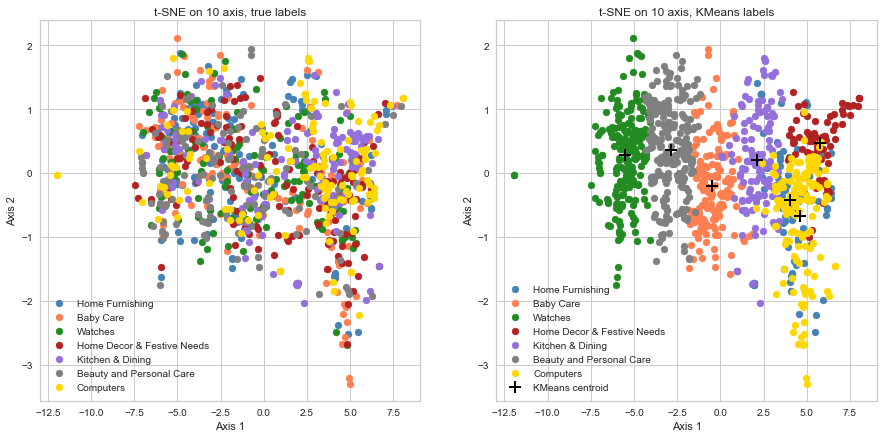

In [207]:
comparison_graph_categories_cv(tsne_orb_refined2, results_computer_vision["level_1"], 10, categories,
    results_computer_vision["img_kmeans_labels_orb_refined2_names"], kmeans_orb_refined2.cluster_centers_)

#### `WTA_K=3`, `nfeatures=1000`, 5 t-SNE components...Still very low ARI. 

We have a total of 1032906 descriptors. Each descriptor is a vector with 32 values.
We will use 1016 clusters to group the descriptors.
Mini Batch KMeans fit time : 74.08s.
Computed 1050 histograms of length 1016.
KMeans fit time : 0.20s.


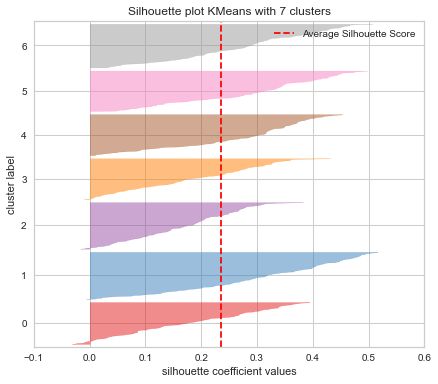

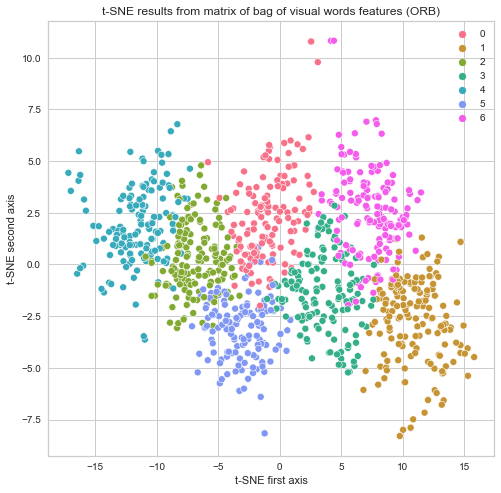

In [208]:
histo_orb_refined3, kmeans_orb_refined3, tsne_orb_refined3 = ORB_hist_tsne(img_orb, 7, nfeatures=1000, WTA_K=3, 
n_comp=5, method="exact", learning_rate=10, random_state=0)

In [209]:
categories_comparison(results_computer_vision, "img_kmeans_labels_orb_refined3", kmeans_orb_refined3.labels_, "level_1")

Cluster 0
Home Furnishing               30
Kitchen & Dining              29
Computers                     22
Baby Care                     20
Home Decor & Festive Needs    20
Watches                       18
Beauty and Personal Care       7
Name: level_1, dtype: int64 

Cluster 1
Computers                     57
Kitchen & Dining              44
Home Furnishing               16
Watches                       15
Baby Care                     13
Beauty and Personal Care      10
Home Decor & Festive Needs     9
Name: level_1, dtype: int64 

Cluster 2
Home Furnishing               43
Beauty and Personal Care      33
Baby Care                     32
Home Decor & Festive Needs    18
Watches                       14
Computers                     11
Kitchen & Dining              11
Name: level_1, dtype: int64 

Cluster 3
Watches                       39
Kitchen & Dining              25
Baby Care                     21
Computers                     16
Beauty and Personal Care      15
Home Decor &

In [210]:
cat_names = ["Beauty and Personal Care", "Computers", "Kitchen & Dining", "Watches", "Home Furnishing", 
    "Baby Care", "Home Decor & Festive Needs"]

clusters_to_true_labels(results_computer_vision, "img_kmeans_labels_orb_refined3", 
    "img_kmeans_labels_orb_refined3_names", cat_names)

In [211]:
ari_orb_tsne_refined3 = adjusted_rand_score(results_computer_vision["level_1"], 
    results_computer_vision["img_kmeans_labels_orb_refined3_names"])
print(f"The adjusted rand score is {ari_orb_tsne_refined3:.2f}.")

The adjusted rand score is 0.04.


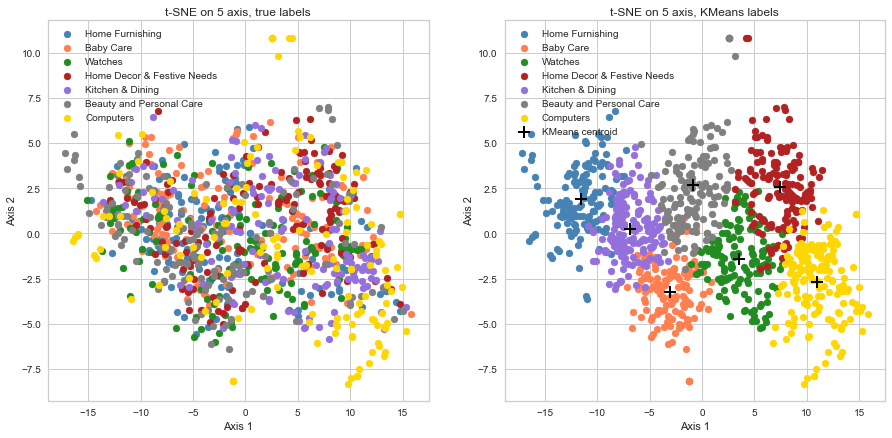

In [212]:
comparison_graph_categories_cv(tsne_orb_refined3, results_computer_vision["level_1"], 5, categories,
    results_computer_vision["img_kmeans_labels_orb_refined3_names"], kmeans_orb_refined3.cluster_centers_)

Even when playing with parameters, the ORB approach do not give very good results. 

Now We can try to combine NLP and computer vision features, or look for neural network approaches.

## Use both NLP and computer vision to categorized products

### With t-SNE dimensions

We will use the 3 t-SNE axis from word2vec pre-trained model and the t-SNE dimensions obtained from ORB descriptors and histograms together with a KMeans clustering.

In [213]:
nlp_cv_features = pd.concat([w2v_gn300_tsne[["axis_1", "axis_2", "axis_3"]], tsne_results_orb_base[["axis_1", "axis_2"]]], axis=1)

In [214]:
nlp_cv_features.head()

axis_1    axis_2    axis_3     axis_1     axis_2
0 -14.640857 -3.689599  3.120446  -9.058819   8.130949
1 -11.966592  8.012860  4.443799  17.947412   2.827380
2 -10.338565  8.081668  3.946836  -9.511458   1.205796
3 -10.298294  4.004013  7.119347 -19.475744  15.772126
4 -10.193836  3.951613  6.233512 -16.619535   7.514725

In [215]:
t0 = time()
kmeans_all = KMeans(n_clusters=7,random_state=0).fit(nlp_cv_features)
t1 = time()-t0
print(f"KMeans fit time : {t1:.2f}s.")

KMeans fit time : 0.68s.


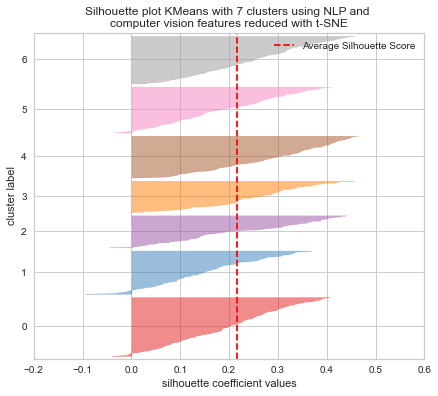

In [216]:
fig, ax = plt.subplots(figsize=(7, 6))
visualizer = SilhouetteVisualizer(KMeans(7, random_state=0),
    title='Silhouette plot KMeans with 7 clusters using NLP and \ncomputer vision features reduced with t-SNE')
visualizer.fit(nlp_cv_features)
visualizer.finalize()

In [217]:
# t_SNE dimensions reduction and visualization
tsne_results_all = TSNE(n_components=2, init="pca", learning_rate=50, n_jobs=-2, random_state=0).fit_transform(nlp_cv_features)

nlp_cv_features["labels"] = kmeans_all.labels_
tsne_results_all = pd.DataFrame(tsne_results_all)

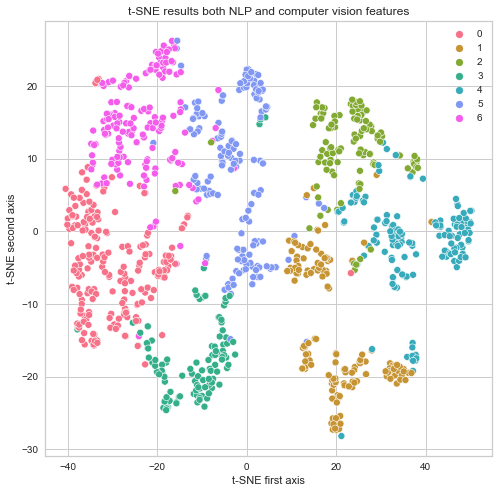

In [218]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(ax=ax, x=tsne_results_all[0], y=tsne_results_all[1], hue=nlp_cv_features["labels"], palette=sns.color_palette("husl", 7))
ax.set_title("t-SNE results both NLP and computer vision features")
ax.set_xlabel("t-SNE first axis")
ax.set_ylabel("t-SNE second axis")
ax.legend();

In [219]:
categories_comparison(results_computer_vision, "nlp_img_kmeans_labels", kmeans_all.labels_, "level_1")

Cluster 0
Baby Care                     60
Home Furnishing               48
Beauty and Personal Care      40
Kitchen & Dining              32
Home Decor & Festive Needs    21
Computers                      3
Watches                        1
Name: level_1, dtype: int64 

Cluster 1
Computers                     90
Watches                       47
Kitchen & Dining              10
Home Decor & Festive Needs     3
Beauty and Personal Care       1
Name: level_1, dtype: int64 

Cluster 2
Baby Care                     49
Home Furnishing               30
Beauty and Personal Care      20
Kitchen & Dining              10
Home Decor & Festive Needs     3
Name: level_1, dtype: int64 

Cluster 3
Watches                       58
Computers                     23
Beauty and Personal Care      23
Home Decor & Festive Needs     4
Baby Care                      1
Home Furnishing                1
Name: level_1, dtype: int64 

Cluster 4
Home Decor & Festive Needs    59
Kitchen & Dining              57
Compu

In [220]:
cat_names = ["Home Decor & Festive Needs", "Baby Care", "Beauty and Personal Care", "Computers", "Home Furnishing", 
    "Watches", "Kitchen & Dining"]

clusters_to_true_labels(results_computer_vision, "nlp_img_kmeans_labels", "nlp_img_kmeans_labels_names", cat_names)

In [221]:
ari_all = adjusted_rand_score(results_computer_vision["level_1"], results_computer_vision["nlp_img_kmeans_labels_names"])
print(f"The adjusted rand score is {ari_all:.2f}.")

The adjusted rand score is 0.17.


Although we combine features, we got a low result, probably because of the misleading ORB features.
### Using raw NLP and computer vision features
We will merge word-embedding features (mean documents vectors) and images histograms.


In [222]:
best_raw_features = pd.concat([pd.DataFrame(all_doc_vec_gn300), pd.DataFrame(histograms_orb_base)], axis=1)
best_raw_features

0         1         2         3         4         5         6    \
0     0.042894  0.045476 -0.006150  0.030052 -0.028071 -0.050948  0.100145   
1     0.027648  0.068713  0.016509  0.068324 -0.004316  0.036095  0.052063   
2     0.016117  0.095866 -0.001201  0.065921 -0.012179  0.045052  0.088026   
3     0.004830  0.041097 -0.042803  0.084351 -0.009427 -0.024091  0.079291   
4     0.008379  0.041414  0.008116  0.074180  0.015057 -0.013216  0.103658   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.002669  0.054524  0.006401  0.047329 -0.077869 -0.004501  0.089813   
1046  0.020952  0.057235  0.008301  0.052461 -0.035763 -0.000526  0.097028   
1047  0.051991  0.129019 -0.037107  0.115834 -0.039634  0.041309  0.062358   
1048  0.099506  0.094223  0.035084  0.209394 -0.043640  0.074844  0.157867   
1049  0.036804  0.103009  0.023912  0.164192 -0.043344 -0.007944  0.068801   

           7         8         9    ...    711    712    713    714    715  \
0    -0.144734  0.072347  0.133723  ...  0.006  0.000  0.000  0.000  0.002   
1    -0.210133  0.050617  0.114142  ...  0.000  0.000  0.002  0.004  0.000   
2    -0.113299  0.083913  0.132010  ...  0.000  0.002  0.006  0.000  0.002   
3    -0.142121  0.070222  0.091875  ...  0.002  0.000  0.000  0.006  0.002   
4    -0.100464  0.058809  0.078448  ...  0.000  0.000  0.002  0.000  0.004   
...        ...       ...       ...  ...    ...    ...    ...    ...    ...   
1045 -0.071760  0.069989  0.072693  ...  0.000  0.002  0.002  0.000  0.000   
1046 -0.105765  0.072324  0.087733  ...  0.000  0.000  0.000  0.000  0.000   
1047 -0.188838  0.082241  0.089719  ...  0.004  0.000  0.000  0.000  0.000   
1048 -0.138744  0.192291  0.090588  ...  0.000  0.000  0.002  0.000  0.000   
1049 -0.109802  0.188777  0.107520  ...  0.000  0.000  0.008  0.002  0.006   

        716    717    718    719    720  
0     0.000  0.000  0.000  0.002  0.000  
1     0.000  0.000  0.000  0.000  0.000  
2     0.004  0.004  0.000  0.000  0.000  
3     0.002  0.000  0.000  0.000  0.000  
4     0.004  0.004  0.002  0.000  0.002  
...     ...    ...    ...    ...    ...  
1045  0.000  0.002  0.000  0.000  0.000  
1046  0.002  0.000  0.000  0.000  0.000  
1047  0.002  0.000  0.000  0.000  0.000  
1048  0.000  0.000  0.002  0.002  0.000  
1049  0.000  0.000  0.000  0.000  0.000  

[1050 rows x 1021 columns]

We have 1021 features. We need to scale our features first.

In [224]:
raw_features_scaled = StandardScaler().fit_transform(best_raw_features)
t0 = time()
kmeans_raw_features = KMeans(n_clusters=7,random_state=0).fit(raw_features_scaled)
t1 = time()-t0
print(f"KMeans fit time : {t1:.2f}s.")


KMeans fit time : 1.28s.


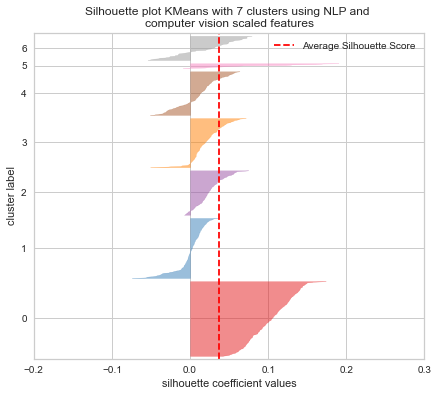

In [225]:
fig, ax = plt.subplots(figsize=(7, 6))
visualizer = SilhouetteVisualizer(KMeans(7, random_state=0),
    title='Silhouette plot KMeans with 7 clusters using NLP and \ncomputer vision scaled features')
visualizer.fit(raw_features_scaled)
visualizer.finalize()

In [226]:
# t_SNE dimensions reduction and visualization
tsne_results_raw_features = TSNE(n_components=2, init="pca", learning_rate=50, n_jobs=-2, random_state=0).fit_transform(raw_features_scaled)

tsne_results_raw_features = pd.DataFrame(tsne_results_raw_features)
tsne_results_raw_features["kmeans_labels"] = kmeans_raw_features.labels_

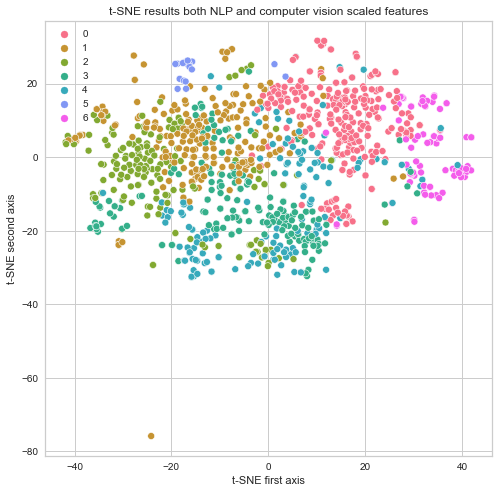

In [227]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(ax=ax, x=tsne_results_raw_features[0], y=tsne_results_raw_features[1], 
    hue=tsne_results_raw_features["kmeans_labels"], palette=sns.color_palette("husl", 7))
ax.set_title("t-SNE results both NLP and computer vision scaled features")
ax.set_xlabel("t-SNE first axis")
ax.set_ylabel("t-SNE second axis")
ax.legend();

In [228]:
categories_comparison(results_computer_vision, "nlp_img_raw_kmeans_labels", kmeans_raw_features.labels_, "level_1")

Cluster 0
Kitchen & Dining              63
Home Decor & Festive Needs    60
Baby Care                     42
Beauty and Personal Care      26
Watches                       25
Home Furnishing               25
Computers                     19
Name: level_1, dtype: int64 

Cluster 1
Home Furnishing               73
Baby Care                     56
Kitchen & Dining              36
Home Decor & Festive Needs    27
Beauty and Personal Care      15
Computers                      2
Name: level_1, dtype: int64 

Cluster 2
Home Furnishing               39
Home Decor & Festive Needs    29
Baby Care                     28
Beauty and Personal Care      21
Watches                       15
Kitchen & Dining              15
Computers                      8
Name: level_1, dtype: int64 

Cluster 3
Watches                       62
Beauty and Personal Care      44
Computers                     27
Baby Care                     14
Kitchen & Dining              14
Home Decor & Festive Needs     9
Home Furnish

In [229]:
cat_names = ["Kitchen & Dining", "Baby Care", "Home Furnishing", "Home Decor & Festive Needs", "Watches", "Computers",  
    "Beauty and Personal Care"]

clusters_to_true_labels(results_computer_vision, "nlp_img_raw_kmeans_labels", "nlp_img_raw_kmeans_labels_names", cat_names)

In [230]:
ari_all = adjusted_rand_score(results_computer_vision["level_1"], results_computer_vision["nlp_img_raw_kmeans_labels_names"])
print(f"The adjusted rand score is {ari_all:.2f}.")

The adjusted rand score is 0.11.


The categorization is still not very successfull...
### Raw features with a PCA before KMeans

In [231]:
raw_features_scaled_df = pd.DataFrame(raw_features_scaled)

In [232]:
n_comp = 600

X = raw_features_scaled_df.values
noms = raw_features_scaled_df.index
features = raw_features_scaled_df.columns

# Main axes calculation
acp = PCA(n_components=n_comp)
acp.fit(X)

PCA(n_components=600)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

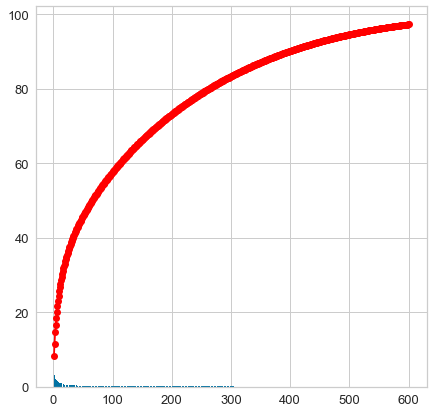

In [233]:
display_eigenvalues(acp, annotate=False)

We will keep coordinates on 600 PCA axis as features, which give us close to 99% of the original information.

In [234]:
raw_features_reduced = acp.transform(raw_features_scaled_df)

In [235]:
pd.DataFrame(raw_features_reduced)

0          1         2         3         4         5         6    \
0     -7.729361   5.775435  0.885797  2.147493 -1.097941 -2.375733 -6.191534   
1      4.103042   3.987062  8.704988  3.588360 -0.615897  2.509498  2.979199   
2     -6.828182  -0.305792  3.837528  1.051831  0.330895  0.891518 -1.505032   
3     -7.700594   9.405211  2.532579  4.728592  2.105074  2.849825  3.925186   
4    -10.532654  -0.110321  4.210653  2.752173  1.812309  2.082295  3.266899   
...         ...        ...       ...       ...       ...       ...       ...   
1045  -6.796451  -3.763154  1.839001 -1.371961  0.062048 -5.488309 -4.965466   
1046  -6.713967  -5.217779 -0.390781 -1.960745 -0.665769 -6.562986 -6.267691   
1047  -5.380877  -4.235524  1.266869 -2.431207  2.226030 -4.434189 -1.989364   
1048  -6.236932 -11.021428  2.025023  0.113735  2.866976 -5.184290 -3.275556   
1049  -7.943261   3.985688 -3.881625  0.829436  3.495279 -2.692766 -2.380936   

           7         8         9    ...       590       591       592  \
0     2.191283  1.497865  2.925035  ...  0.485428 -0.059091  0.845621   
1    -5.181199  0.206165 -0.384546  ...  1.047000  0.293809 -0.760012   
2    -1.330650  7.948132  7.120879  ...  0.039883  0.139366  0.442576   
3    -2.022583 -1.948589  5.123475  ... -0.531657 -0.335138  0.162555   
4    -1.956602 -2.764659  3.997549  ...  0.207385 -0.569122 -0.369835   
...        ...       ...       ...  ...       ...       ...       ...   
1045 -0.827042 -1.426357  1.216149  ...  0.006467 -1.042826  0.769818   
1046 -0.523898 -1.674802  0.558811  ...  0.328707  0.634450  0.265630   
1047 -1.142392  3.395769  6.346589  ... -0.355918  0.564921  0.853503   
1048  3.181030 -2.258772  2.109399  ...  0.543852  0.337200 -0.058672   
1049  0.842434 -1.604217  3.111634  ... -0.478633  0.410401  0.402569   

           593       594       595       596       597       598       599  
0     0.624408  0.460274  0.094645 -0.731480 -0.574557  0.256249  0.354734  
1     0.056367 -0.060193  0.657933 -0.096203 -0.064667 -0.178611  0.760391  
2     0.076445  0.124426  0.181139 -0.638960  0.474605 -0.222040  0.807069  
3     0.260296 -0.500548  0.463252 -0.536964 -0.198426 -0.181800 -0.838881  
4    -0.330642 -0.194181 -0.433480 -0.556229  0.065904 -0.252731 -0.218312  
...        ...       ...       ...       ...       ...       ...       ...  
1045 -0.372151 -0.696983  0.010309  0.460862  0.641773 -0.359731 -0.604322  
1046 -0.773352 -0.189092  0.560391  0.488379  0.960414 -0.488485 -0.527425  
1047  0.030504  0.045102  0.245075 -0.063660  0.441240  0.326809  0.509146  
1048 -0.126045 -0.214943  0.431861 -0.049067 -0.195820  0.138573 -0.276686  
1049 -0.297491 -0.270769 -0.514773  0.325181 -0.504686 -0.140880 -0.380030  

[1050 rows x 600 columns]

In [236]:
t0 = time()
kmeans_raw_features_reduced = KMeans(n_clusters=7,random_state=0).fit(raw_features_reduced)
t1 = time()-t0
print(f"KMeans fit time : {t1:.2f}s.")

KMeans fit time : 7.15s.


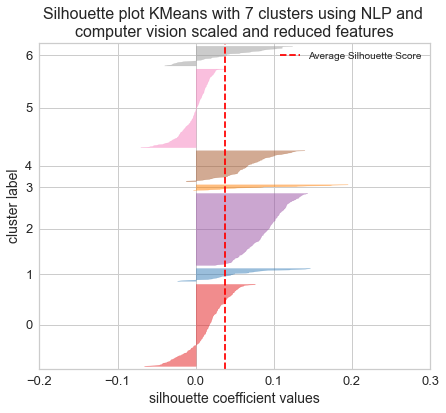

In [237]:
fig, ax = plt.subplots(figsize=(7, 6))
visualizer = SilhouetteVisualizer(KMeans(7, random_state=0),
    title='Silhouette plot KMeans with 7 clusters using NLP and \ncomputer vision scaled and reduced features')
visualizer.fit(raw_features_reduced)
visualizer.finalize()

In [238]:
# t_SNE dimensions reduction and visualization
tsne_results_raw_features_reduced = TSNE(n_components=2, init="pca", learning_rate=50, n_jobs=-2, random_state=0).fit_transform(raw_features_reduced)

tsne_results_raw_features_reduced = pd.DataFrame(tsne_results_raw_features_reduced)
tsne_results_raw_features_reduced["kmeans_labels"] = kmeans_raw_features_reduced.labels_

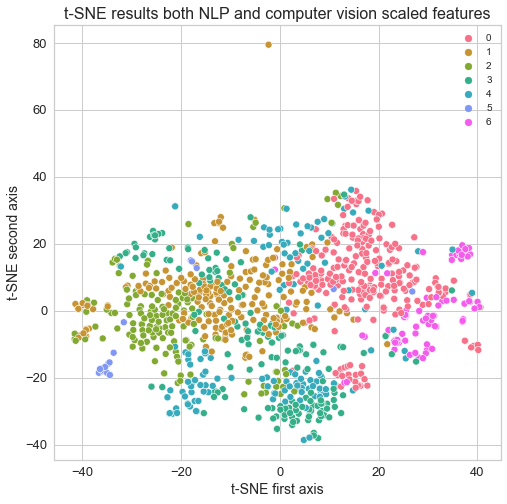

In [239]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(ax=ax, x=tsne_results_raw_features_reduced[0], y=tsne_results_raw_features_reduced[1], 
    hue=tsne_results_raw_features["kmeans_labels"], palette=sns.color_palette("husl", 7))
ax.set_title("t-SNE results both NLP and computer vision scaled features")
ax.set_xlabel("t-SNE first axis")
ax.set_ylabel("t-SNE second axis")
ax.legend();

In [240]:
categories_comparison(results_computer_vision, "nlp_img_raw_reduced_kmeans_labels", 
    kmeans_raw_features_reduced.labels_, "level_1")

Cluster 0
Beauty and Personal Care      62
Home Furnishing               59
Home Decor & Festive Needs    55
Kitchen & Dining              36
Baby Care                     34
Watches                       20
Computers                     19
Name: level_1, dtype: int64 

Cluster 1
Computers    45
Name: level_1, dtype: int64 

Cluster 2
Kitchen & Dining              67
Home Decor & Festive Needs    63
Baby Care                     41
Beauty and Personal Care      29
Home Furnishing               25
Watches                       21
Computers                      4
Name: level_1, dtype: int64 

Cluster 3
Home Furnishing    13
Baby Care           7
Name: level_1, dtype: int64 

Cluster 4
Watches                       102
Computers                       4
Home Decor & Festive Needs      2
Name: level_1, dtype: int64 

Cluster 5
Baby Care                     66
Beauty and Personal Care      58
Home Furnishing               51
Kitchen & Dining              40
Home Decor & Festive Needs    28
C

In [241]:
cat_names = ["Watches", "Home Furnishing", "Computers", "Kitchen & Dining", "Beauty and Personal Care", 
    "Baby Care", "Home Decor & Festive Needs"]

clusters_to_true_labels(results_computer_vision, "nlp_img_raw_reduced_kmeans_labels", 
    "nlp_img_raw_reduced_kmeans_labels_names", cat_names)

In [242]:
ari_raw_reduced = adjusted_rand_score(results_computer_vision["level_1"], results_computer_vision["nlp_img_raw_reduced_kmeans_labels"])
print(f"The adjusted rand score is {ari_raw_reduced:.2f}.")

The adjusted rand score is 0.12.


Not better with CPA before...

## Supervised approach for computer vision: VGG16 neural network
We will preprocess images by adding a white border and resize images so that the aspect ratio will be preserved.

In [243]:
def preprocess_resize(images, final_size, border_color):
    """
    """
    images_final = []

    for i, img in enumerate(images):
        height = images[i].shape[0]
        width = images[i].shape[1]

        if height == width:
            img_border = images[i]
        elif height > width:
            border = round((height - width) / 2)
            img_border = cv2.copyMakeBorder(images[i], 0, 0, border, border, 
                                            cv2.BORDER_CONSTANT, None, value = border_color)
        else:
            border = round((width - height) / 2)
            img_border = cv2.copyMakeBorder(images[i], border, border, 0, 0, 
                                            cv2.BORDER_CONSTANT, None, value = border_color)
        
        img_resized = cv2.resize(img_border, final_size, interpolation = cv2.INTER_AREA)
        images_final.append(img_resized)
    
    images_final = np.asarray(images_final)

    return images_final

In [244]:
# Pre-processing images by resizing and formatting for tensorflow
img_resized = preprocess_resize(img_base, (224, 224), (255, 255, 255))
img_inputs = vgg16.preprocess_input(img_resized)

In [246]:
# Creating directories for training, validation and test sets
train_dir = "training"
validation_dir = "validation"
test_dir = "test"

train_path = os.path.join(file_path, train_dir)
validation_path = os.path.join(file_path, validation_dir)
test_path = os.path.join(file_path, test_dir)

os.mkdir(train_path)
os.mkdir(validation_path)
os.mkdir(test_path)

In [247]:
# Creating categories directories
categories_short = ["furnishing", "baby", "watches", "decor", "kitchen", "beauty", "computers"]

for name in categories_short:
    cat_path_train = os.path.join(train_path, name)
    cat_path_val = os.path.join(validation_path, name)
    cat_path_test = os.path.join(test_path, name)
    os.mkdir(cat_path_train)
    os.mkdir(cat_path_val)
    os.mkdir(cat_path_test)

In [248]:
# Create path names
path_train_furnishing = os.path.join(train_path, "furnishing")
path_train_baby = os.path.join(train_path, "baby")
path_train_watches = os.path.join(train_path, "watches")
path_train_decor = os.path.join(train_path, "decor")
path_train_kitchen = os.path.join(train_path, "kitchen")
path_train_beauty = os.path.join(train_path, "beauty")
path_train_computers = os.path.join(train_path, "computers")

path_validation_furnishing = os.path.join(validation_path, "furnishing")
path_validation_baby = os.path.join(validation_path, "baby")
path_validation_watches = os.path.join(validation_path, "watches")
path_validation_decor = os.path.join(validation_path, "decor")
path_validation_kitchen = os.path.join(validation_path, "kitchen")
path_validation_beauty = os.path.join(validation_path, "beauty")
path_validation_computers = os.path.join(validation_path, "computers")

path_test_furnishing = os.path.join(test_path, "furnishing")
path_test_baby = os.path.join(test_path, "baby")
path_test_watches = os.path.join(test_path, "watches")
path_test_decor = os.path.join(test_path, "decor")
path_test_kitchen = os.path.join(test_path, "kitchen")
path_test_beauty = os.path.join(test_path, "beauty")
path_test_computers = os.path.join(test_path, "computers")

In [249]:
# Sort images in lists depending on their true categories
images_furnishing = []
images_baby = []
images_watches = []
images_decor = []
images_kitchen = []
images_beauty = []
images_computers = []

for i, image in enumerate(img_resized):
    if results_computer_vision.loc[i, :]["level_1"]=="Home Furnishing":
        images_furnishing.append(image)
    elif results_computer_vision.loc[i, :]["level_1"]=="Baby Care":
        images_baby.append(image)
    elif results_computer_vision.loc[i, :]["level_1"]=="Watches":
        images_watches.append(image)
    elif results_computer_vision.loc[i, :]["level_1"]=="Home Decor & Festive Needs":
        images_decor.append(image)
    elif results_computer_vision.loc[i, :]["level_1"]=="Kitchen & Dining":
        images_kitchen.append(image)
    elif results_computer_vision.loc[i, :]["level_1"]=="Beauty and Personal Care":
        images_beauty.append(image)
    else:
        images_computers.append(image)

In [250]:
def write_images_in_folders(list_images, slice_begining, slice_end, root_names, paths_list):
    """
    Make folder according to categories.
    """
    for list_img, root_name, path in zip(list_images, root_names, paths_list):
        for i, image in enumerate (list_img[slice_begining:slice_end]):
            name = root_name + str(i) + ".jpg"
            new_img_path = os.path.join(path, name)
            cv2.imwrite(new_img_path, list_img[slice_begining+i])

In [254]:
# Split images into train, validation and test sets
images_all_cat = [images_furnishing, images_baby, images_watches, images_decor, images_kitchen, 
    images_beauty, images_computers]
root_names = ["furnishing_", "baby_", "watches_", "decor_", "kitchen_", "beauty_", "computers_"]

all_paths_train = [path_train_furnishing, path_train_baby, path_train_watches, path_train_decor,
    path_train_kitchen, path_train_beauty, path_train_computers]
all_paths_validation = [path_validation_furnishing, path_validation_baby, path_validation_watches, path_validation_decor,
    path_validation_kitchen, path_validation_beauty, path_validation_computers]
all_paths_test = [path_test_furnishing, path_test_baby, path_test_watches, path_test_decor,
    path_test_kitchen, path_test_beauty, path_test_computers]

write_images_in_folders(images_all_cat, 0, 110, root_names, all_paths_train)
write_images_in_folders(images_all_cat, 110, 130, root_names, all_paths_validation)
write_images_in_folders(images_all_cat, 130, 150, root_names, all_paths_test)

### Basic pre-trained VGG16

First we use the pre-trained VGG16 as is with the 1000 pre-defined classes.

In [255]:
#Define model and make predictions
vgg16_basic = tf.keras.applications.VGG16()
vgg16_basic_proba = vgg16_basic.predict(img_inputs)

In [ ]:
# Add a column with predicted classes
results_computer_vision["n_img"] = results_computer_vision.index
results_computer_vision["vgg16_basic"] = results_computer_vision["n_img"].apply(
    lambda x: vgg16.decode_predictions(vgg16_basic_proba, top=1)[x][0][1])

The top 1 predicted classes of VGG 16 for the first 10 images:

In [ ]:
results_computer_vision["vgg16_basic"][:10]